# INN Hotels Project

## Context

A significant number of hotel bookings are called-off due to cancellations or no-shows. The typical reasons for cancellations include change of plans, scheduling conflicts, etc. This is often made easier by the option to do so free of charge or preferably at a low cost which is beneficial to hotel guests but it is a less desirable and possibly revenue-diminishing factor for hotels to deal with. Such losses are particularly high on last-minute cancellations. 

The new technologies involving online booking channels have dramatically changed customers’ booking possibilities and behavior. This adds a further dimension to the challenge of how hotels handle cancellations, which are no longer limited to traditional booking and guest characteristics. 

The cancellation of bookings impact a hotel on various fronts:
* Loss of resources (revenue) when the hotel cannot resell the room.
* Additional costs of distribution channels by increasing commissions or paying for publicity to help sell these rooms.
* Lowering prices last minute, so the hotel can resell a room, resulting in reducing the profit margin.
* Human resources to make arrangements for the guests.

## Objective
The increasing number of cancellations calls for a Machine Learning based solution that can help in predicting which booking is likely to be canceled. INN Hotels Group has a chain of hotels in Portugal, they are facing problems with the high number of booking cancellations and have reached out to your firm for data-driven solutions. You as a data scientist have to analyze the data provided to find which factors have a high influence on booking cancellations, build a predictive model that can predict which booking is going to be canceled in advance, and help in formulating profitable policies for cancellations and refunds.

## Data Description
The data contains the different attributes of customers' booking details. The detailed data dictionary is given below.


**Data Dictionary**

* Booking_ID: unique identifier of each booking
* no_of_adults: Number of adults
* no_of_children: Number of Children
* no_of_weekend_nights: Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel
* no_of_week_nights: Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel
* type_of_meal_plan: Type of meal plan booked by the customer:
    * Not Selected – No meal plan selected
    * Meal Plan 1 – Breakfast
    * Meal Plan 2 – Half board (breakfast and one other meal)
    * Meal Plan 3 – Full board (breakfast, lunch, and dinner)
* required_car_parking_space: Does the customer require a car parking space? (0 - No, 1- Yes)
* room_type_reserved: Type of room reserved by the customer. The values are ciphered (encoded) by INN Hotels.
* lead_time: Number of days between the date of booking and the arrival date
* arrival_year: Year of arrival date
* arrival_month: Month of arrival date
* arrival_date: Date of the month
* market_segment_type: Market segment designation.
* repeated_guest: Is the customer a repeated guest? (0 - No, 1- Yes)
* no_of_previous_cancellations: Number of previous bookings that were canceled by the customer prior to the current booking
* no_of_previous_bookings_not_canceled: Number of previous bookings not canceled by the customer prior to the current booking
* avg_price_per_room: Average price per day of the reservation; prices of the rooms are dynamic. (in euros)
* no_of_special_requests: Total number of special requests made by the customer (e.g. high floor, view from the room, etc)
* booking_status: Flag indicating if the booking was canceled or not.

## Importing necessary libraries and data

In [1]:
# this will help in making the Python code more structured automatically (help adhere to good coding practices)
%load_ext nb_black

import warnings

warnings.filterwarnings("ignore")
from statsmodels.tools.sm_exceptions import ConvergenceWarning

warnings.simplefilter("ignore", ConvergenceWarning)

# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)
# setting the precision of floating numbers to 5 decimal points
pd.set_option("display.float_format", lambda x: "%.5f" % x)

# Library to split data to training and testing
from sklearn.model_selection import train_test_split

# To build model for prediction
import statsmodels.stats.api as sms
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from statsmodels.tools.tools import add_constant

# Libraries to build decision tree classifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# To tune different models(grid search)-prepruning technique as well
from sklearn.model_selection import GridSearchCV


# To get diferent metric scores
# To measure how good or bad our model preformance is
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    plot_confusion_matrix,
    precision_recall_curve,
    roc_curve,
    make_scorer,
)

<IPython.core.display.Javascript object>

## Defining the problem and perform an Exploratory Data Analysis

## Read the dataset

In [2]:
## Reading a dataset from a csv file using pandas.
df = pd.read_csv("INNHotelsGroup.csv")

<IPython.core.display.Javascript object>

In [3]:
# creating a copy of the data so that original data remains unchanged
df = df.copy()

<IPython.core.display.Javascript object>

### View the  first and last 5 rows of the dataset 

In [4]:
# first 5 dataset details
df.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00000,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68000,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00000,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00000,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50000,0,Canceled


<IPython.core.display.Javascript object>

In [5]:
# last 5 dataset details
df.tail()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
36270,INN36271,3,0,2,6,Meal Plan 1,0,Room_Type 4,85,2018,8,3,Online,0,0,0,167.80000,1,Not_Canceled
36271,INN36272,2,0,1,3,Meal Plan 1,0,Room_Type 1,228,2018,10,17,Online,0,0,0,90.95000,2,Canceled
36272,INN36273,2,0,2,6,Meal Plan 1,0,Room_Type 1,148,2018,7,1,Online,0,0,0,98.39000,2,Not_Canceled
36273,INN36274,2,0,0,3,Not Selected,0,Room_Type 1,63,2018,4,21,Online,0,0,0,94.50000,0,Canceled
36274,INN36275,2,0,1,2,Meal Plan 1,0,Room_Type 1,207,2018,12,30,Offline,0,0,0,161.67000,0,Not_Canceled


<IPython.core.display.Javascript object>

In [6]:
# show random sample
df.sample(10)

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
36165,INN36166,1,0,1,2,Meal Plan 1,0,Room_Type 1,2,2017,11,9,Complementary,0,0,0,79.00000,0,Not_Canceled
10333,INN10334,1,0,0,2,Meal Plan 1,0,Room_Type 1,181,2018,10,11,Offline,0,0,0,120.00000,0,Canceled
15115,INN15116,2,0,1,0,Not Selected,0,Room_Type 1,92,2018,9,19,Online,0,0,0,125.10000,2,Not_Canceled
36109,INN36110,2,0,0,2,Meal Plan 1,0,Room_Type 4,28,2018,9,28,Online,0,0,0,154.00000,2,Not_Canceled
29829,INN29830,2,0,0,3,Meal Plan 1,0,Room_Type 4,94,2018,4,14,Online,0,0,0,105.30000,0,Canceled
20997,INN20998,2,0,2,4,Meal Plan 1,0,Room_Type 1,173,2017,10,15,Online,0,0,0,89.25000,0,Canceled
3226,INN03227,2,0,0,3,Meal Plan 1,0,Room_Type 1,103,2018,5,4,Offline,0,0,0,80.00000,0,Not_Canceled
27353,INN27354,2,0,2,3,Meal Plan 1,0,Room_Type 4,97,2018,10,22,Online,0,0,0,121.14000,3,Not_Canceled
28523,INN28524,2,0,0,3,Meal Plan 1,0,Room_Type 4,16,2018,6,2,Online,0,0,0,152.67000,1,Not_Canceled
20316,INN20317,2,2,1,4,Meal Plan 1,0,Room_Type 6,26,2018,4,25,Online,0,0,0,197.78000,0,Canceled


<IPython.core.display.Javascript object>

#### Observations:
* * The datatypes of the different columns in the dataset are int(13 nos), float(1 no), object(5 no).
* Booking_ID, type_of_meal_plan, room_type_reserved,market_segment_type,booking_status are object type.

* no_of_adults, no_of_children, no_of_weekend_nights, no_of_week_nights, arrival_year, arrival_month, arrival_date,repeated_guest  no_of_previous_cancellations, no_of_previous_bookings_not_canceled, avg_price_per_room, no_of_special_requests are of integers and float.

* Data in each row contains the different attributes of customers booking details.
* 5 categorical data

## Data Pre-processing

### Understand the shape of the dataset

In [7]:
# checking the shape of the data
print(f"There are {df.shape[0]} rows and {df.shape[1]} columns.")  # f-string

There are 36275 rows and 19 columns.


<IPython.core.display.Javascript object>

#### Observations:

* The dataset has 32561 rows and 14 columns 




### Let's check the duplicate data. And if any, we should remove it.

In [8]:
df[df.duplicated()].count()

Booking_ID                              0
no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

<IPython.core.display.Javascript object>

#### Observations:

* There is no duplicate values


### Checking the data types of the columns for the dataset

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

<IPython.core.display.Javascript object>

#### Observations: 
* The datatypes of the different columns in the dataset are int(13 nos), float(1 no), object(5 no).
* 5 Categorical data.
* There is no missing values.
* Memory usage is 5.3+MB.

### Check for missing values

In [10]:
df.isnull().sum()
# shows no missing data

Booking_ID                              0
no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

<IPython.core.display.Javascript object>

#### Observations:
* There are no missing values in the data.

In [11]:
print(df.columns)

Index(['Booking_ID', 'no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month',
       'arrival_date', 'market_segment_type', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests', 'booking_status'],
      dtype='object')


<IPython.core.display.Javascript object>

### Drop the Booking_ID as it is not needed for analysis

In [12]:
# Drop Booking_ID as it is not needed for analysis
df = df.drop("Booking_ID", axis=1)

<IPython.core.display.Javascript object>

In [13]:
df.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00000,0,Not_Canceled
1,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68000,1,Not_Canceled
2,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00000,0,Canceled
3,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00000,0,Canceled
4,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50000,0,Canceled


<IPython.core.display.Javascript object>

### Statistical summary of the data

In [14]:
# Let's look at the statistical summary of the data
df.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
no_of_adults,36275.00000,NaN,NaN,NaN,1.84496,0.51871,0.00000,2.00000,2.00000,2.00000,4.00000
no_of_children,36275.00000,NaN,NaN,NaN,0.10528,0.40265,0.00000,0.00000,0.00000,0.00000,10.00000
no_of_weekend_nights,36275.00000,NaN,NaN,NaN,0.81072,0.87064,0.00000,0.00000,1.00000,2.00000,7.00000
no_of_week_nights,36275.00000,NaN,NaN,NaN,2.20430,1.41090,0.00000,1.00000,2.00000,3.00000,17.00000
type_of_meal_plan,36275,4,Meal Plan 1,27835,NaN,NaN,NaN,NaN,NaN,NaN,NaN
required_car_parking_space,36275.00000,NaN,NaN,NaN,0.03099,0.17328,0.00000,0.00000,0.00000,0.00000,1.00000
room_type_reserved,36275,7,Room_Type 1,28130,NaN,NaN,NaN,NaN,NaN,NaN,NaN
lead_time,36275.00000,NaN,NaN,NaN,85.23256,85.93082,0.00000,17.00000,57.00000,126.00000,443.00000
arrival_year,36275.00000,NaN,NaN,NaN,2017.82043,0.38384,2017.00000,2018.00000,2018.00000,2018.00000,2018.00000
arrival_month,36275.00000,NaN,NaN,NaN,7.42365,3.06989,1.00000,5.00000,8.00000,10.00000,12.00000


<IPython.core.display.Javascript object>

#### Observations:

* There are 36275 bookings.
* There is 4 type of meal_plan.
* There is 7 type of room reserved by the customer.
* There is 5 market segment designation.
* Average price of a room is 103.42 euros.

## Univariate Analysis

In [15]:
def histogram_boxplot(data, feature, figsize=(15, 10), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (15,10))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

<IPython.core.display.Javascript object>

In [16]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 2, 6))
    else:
        plt.figure(figsize=(n + 2, 6))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

<IPython.core.display.Javascript object>

In [17]:
### function to plot distributions wrt target


def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

<IPython.core.display.Javascript object>

In [18]:
# function to plot stacked bar chart


def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 6))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

<IPython.core.display.Javascript object>

<a id='eda'></a>
### <a id='link1'>Executive Summary of EDA</a>
#### Data Description:
- There is no duplicate values in the dataset.
- There are no missing values in the data.
- Most of the data-types are either int64 or float64.
- 5 columns - Booking_ID, type_of_meal_plan,room_type_reserved,market_segment_type,booking_status are object type, this means we need to convert these into suitable data-type before we feed our data into the model.


### Observations on Number of adults

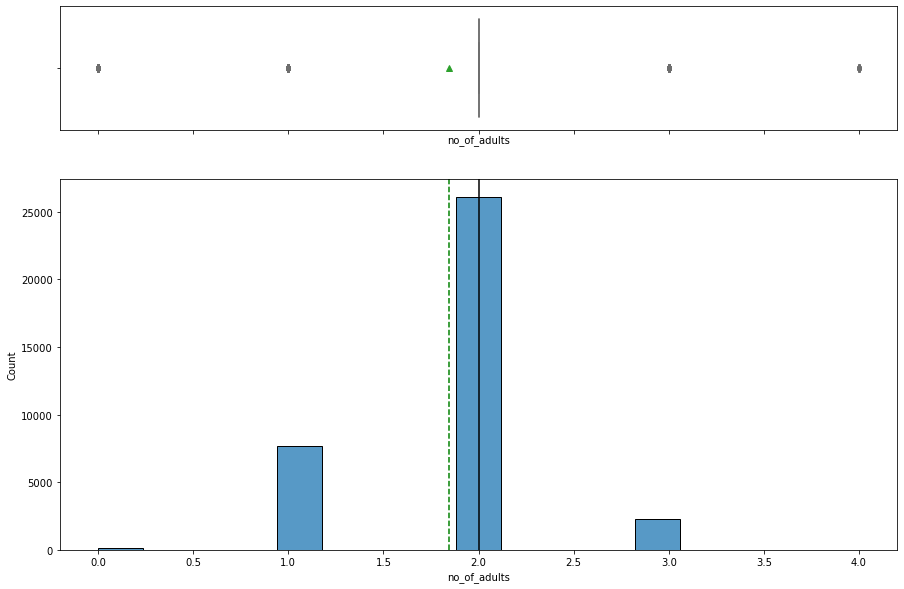

<IPython.core.display.Javascript object>

In [19]:
# histogram for Number of adults.
# the data is numeric
histogram_boxplot(df, "no_of_adults")

 #### Observations:
* Mean is around 1.8 and median 2
* There is outliers
* Median is higher than mean

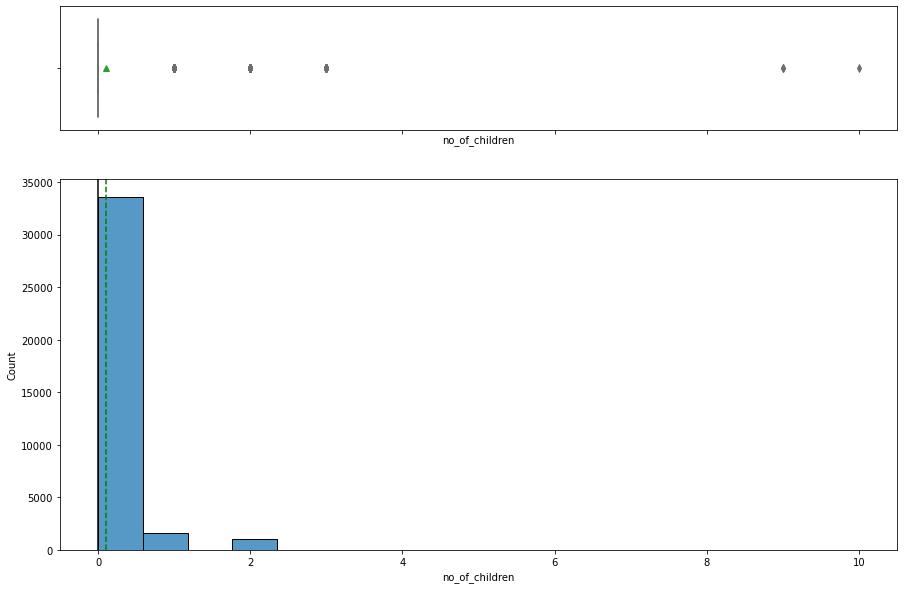

<IPython.core.display.Javascript object>

In [20]:
# histogram for Number of Children
# the data is numeric
histogram_boxplot(df, "no_of_children")

#### Observations:
* Mean is around .10 and median 0
* There is outliers
* Mean is little higher than median

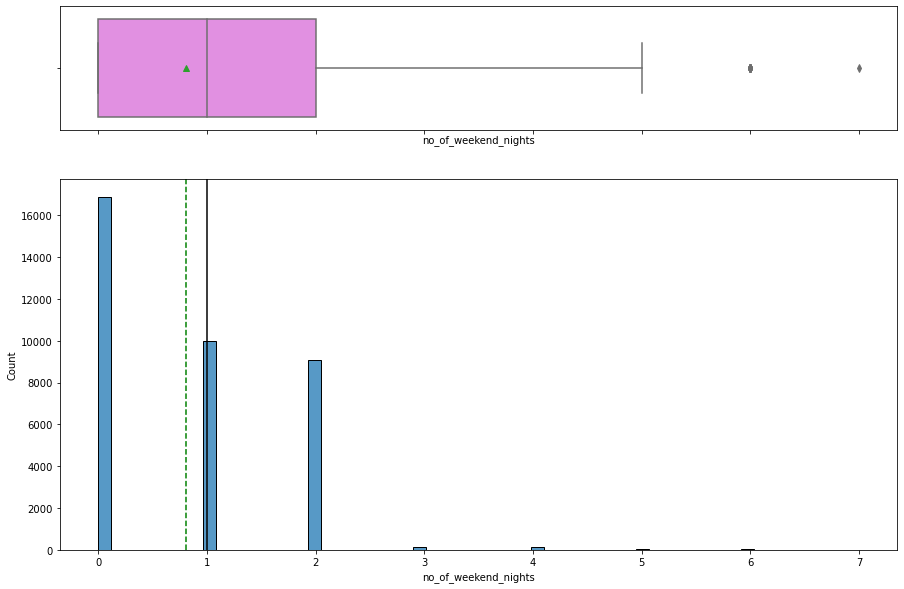

<IPython.core.display.Javascript object>

In [21]:
# histogram for Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel
# the data is numeric
histogram_boxplot(df, "no_of_weekend_nights")

#### Observations:
* Mean is around .81 and median 1
* There is outliers
* Median is little higher than mean

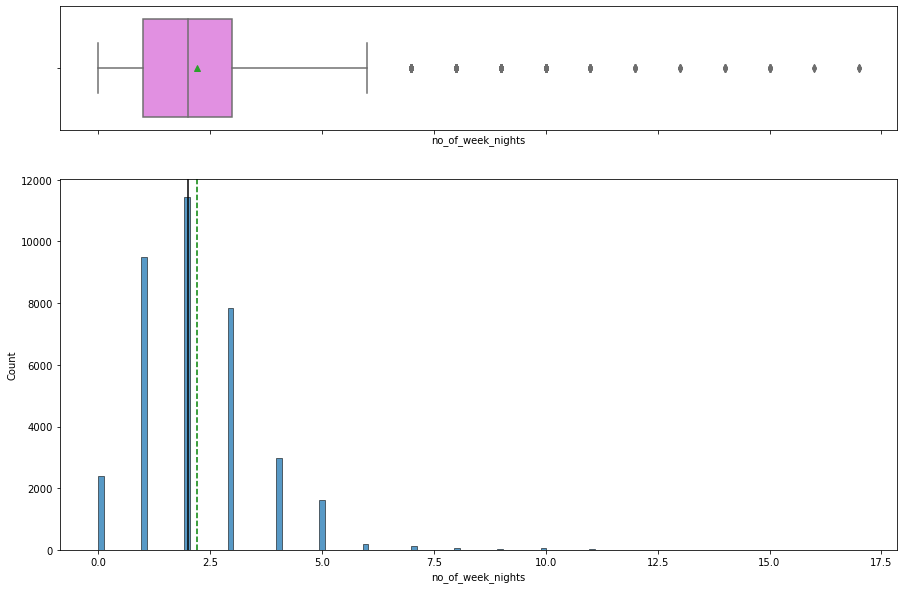

<IPython.core.display.Javascript object>

In [22]:
# histogram for Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel
# the data is numeric
histogram_boxplot(df, "no_of_week_nights")

#### Observations:
* Mean is around 2.2 and median 2
* There is outliers
* Mean is higher than median

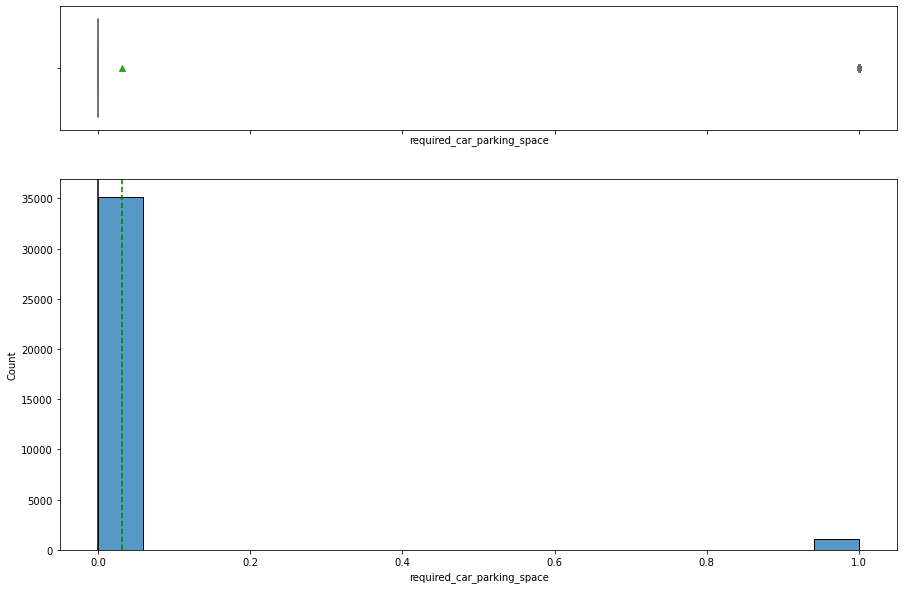

<IPython.core.display.Javascript object>

In [23]:
# histogram for customer car parking space
# the data is numeric
histogram_boxplot(df, "required_car_parking_space")

#### Observations:
* Mean is around .03 and median 0
* There is few outliers
* Mean is little higher than median

### Observations on lead time

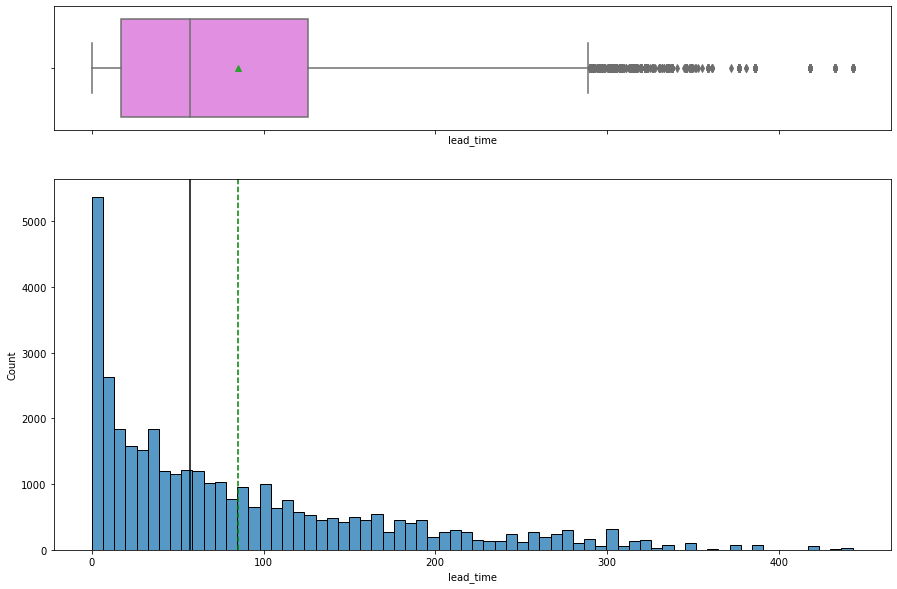

<IPython.core.display.Javascript object>

In [24]:
# histogram for Number of days between the date of booking and the arrival date
# the data is numeric
histogram_boxplot(df, "lead_time")

#### Observations:
* Mean is around 85 and median 57
* There is so many outliers
* Mean is higher than median
* Mean and Median difference is high, mean data is skewed, here right skewed.

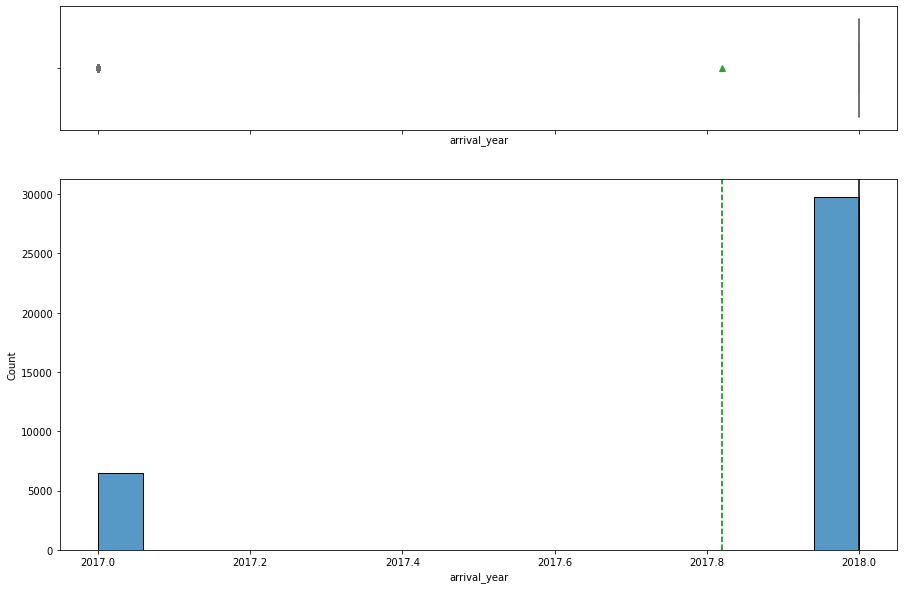

<IPython.core.display.Javascript object>

In [25]:
# histogram for Year of arrival date
# the data is numeric
histogram_boxplot(df, "arrival_year")

#### Observations:
* Mean is around 2017 and median 2018
* There is outliers


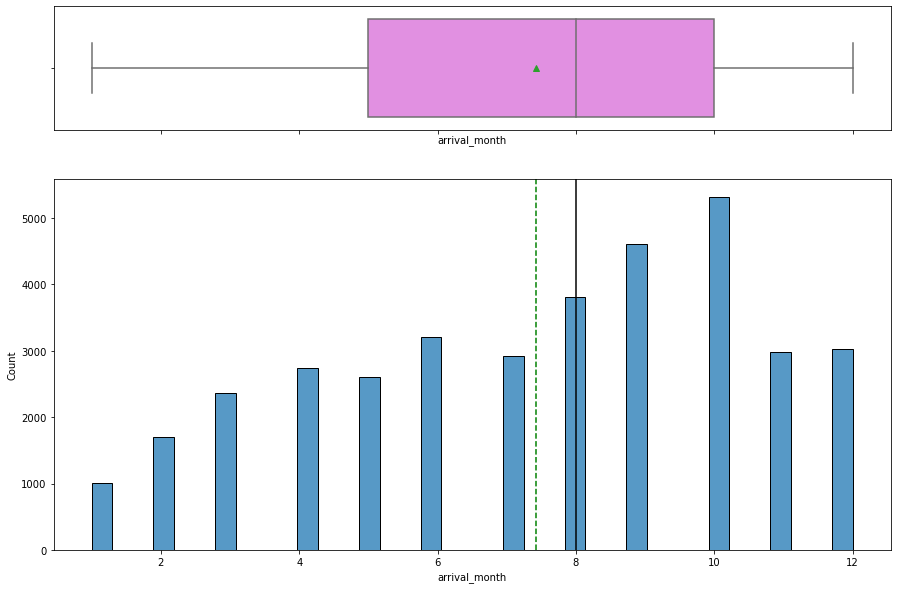

<IPython.core.display.Javascript object>

In [26]:
# histogram for Month of arrival date
# the data is numeric
histogram_boxplot(df, "arrival_month")

#### Observations:
* Mean is around 7.4 and median 8
* There is no outliers
* Median is higher than mean

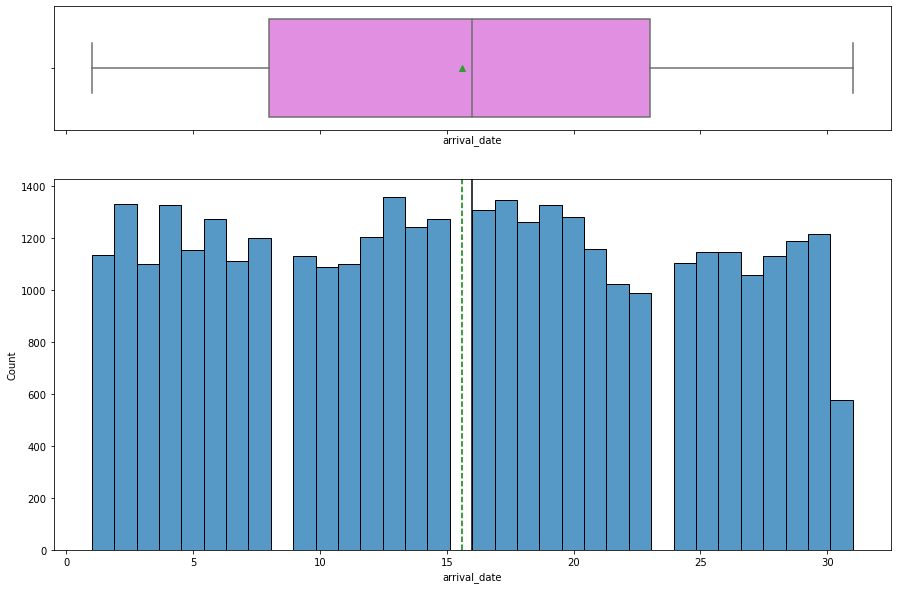

<IPython.core.display.Javascript object>

In [27]:
# histogram for Date of the month
# the data is numeric
histogram_boxplot(df, "arrival_date")

#### Observations:
* Mean is around 15.59 and median 16
* There is no outliers
* Median is higher than mean

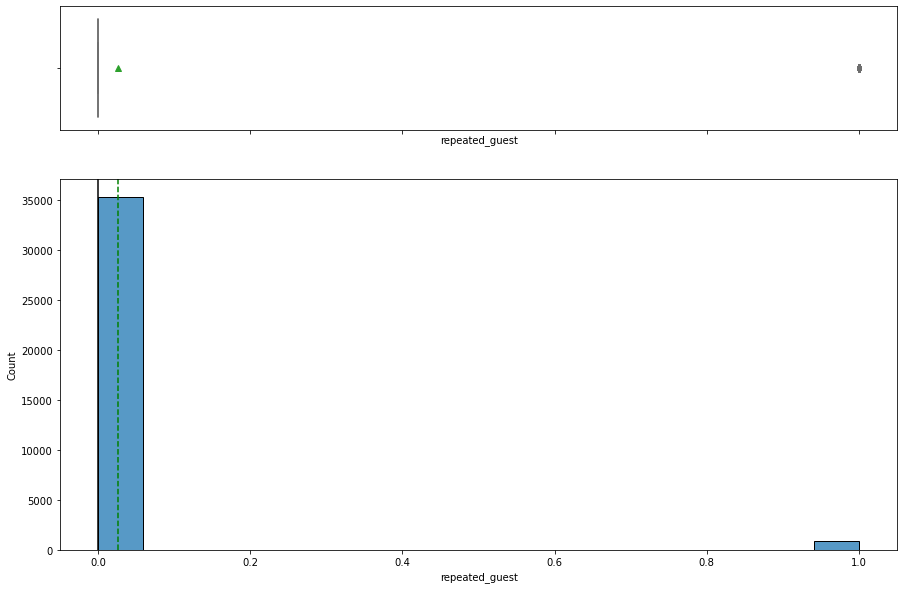

<IPython.core.display.Javascript object>

In [28]:
#histogram for customer a repeated guest
#the data is numeric 
histogram_boxplot(df, 'repeated_guest')



#### Observations:
* Mean is around .02 and median 0
* There is some outliers
* Mean is slightly higher than median

### Observations on number of previous booking cancellations

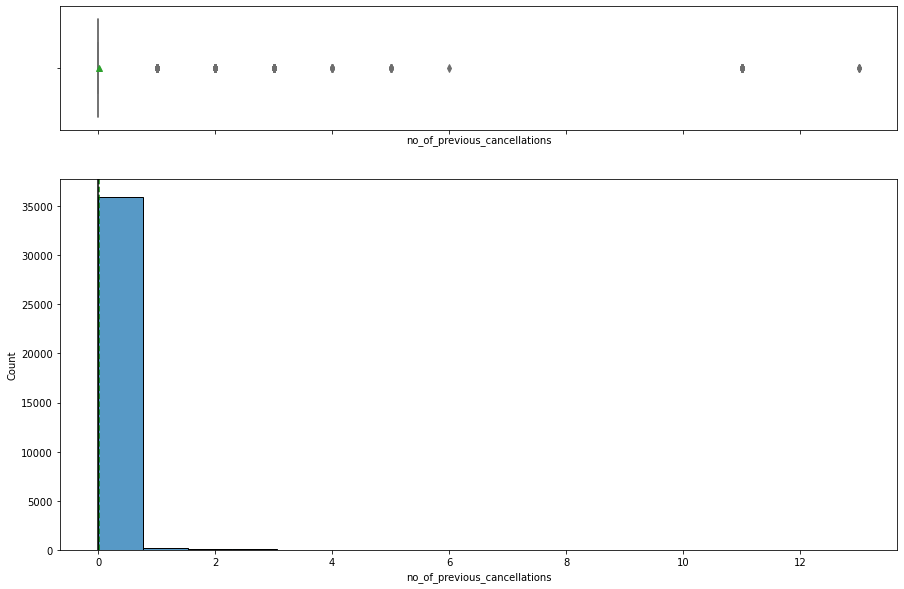

<IPython.core.display.Javascript object>

In [29]:
# histogram for Number of previous bookings that were canceled by the customer prior to the current booking
# the data is numeric
histogram_boxplot(df, "no_of_previous_cancellations")

#### Observations:
* Mean is around .02 and median 0
* There is outliers
* Mean is slightly higher than median

### Observations on number of previous booking not canceled¶

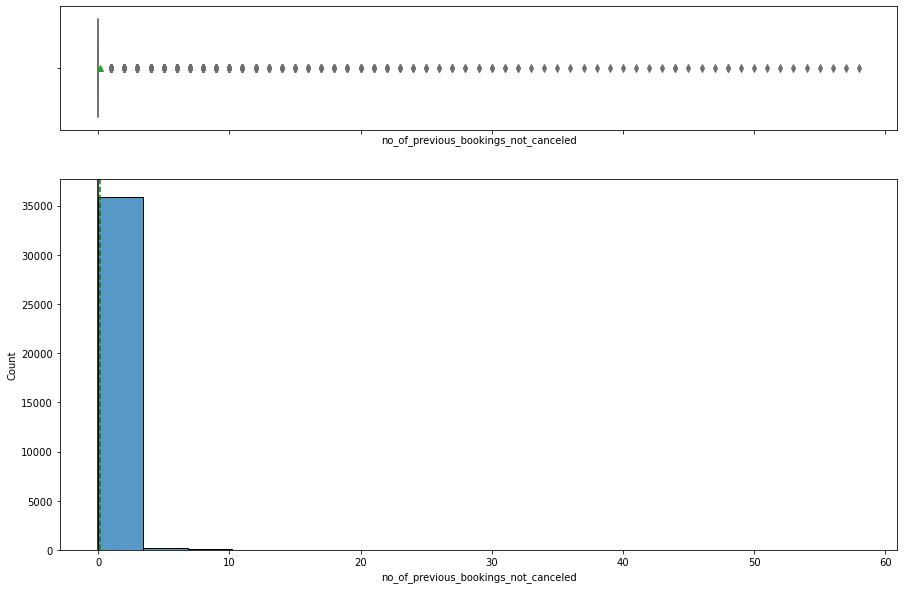

<IPython.core.display.Javascript object>

In [30]:
# histogram for Number of previous bookings not canceled by the customer prior to the current booking
# the data is numeric
histogram_boxplot(df, "no_of_previous_bookings_not_canceled")

#### Observations:
* Mean is around .78 and median 0
* There is lot of outliers
* Mean is higher than median

### Observations on average price per room

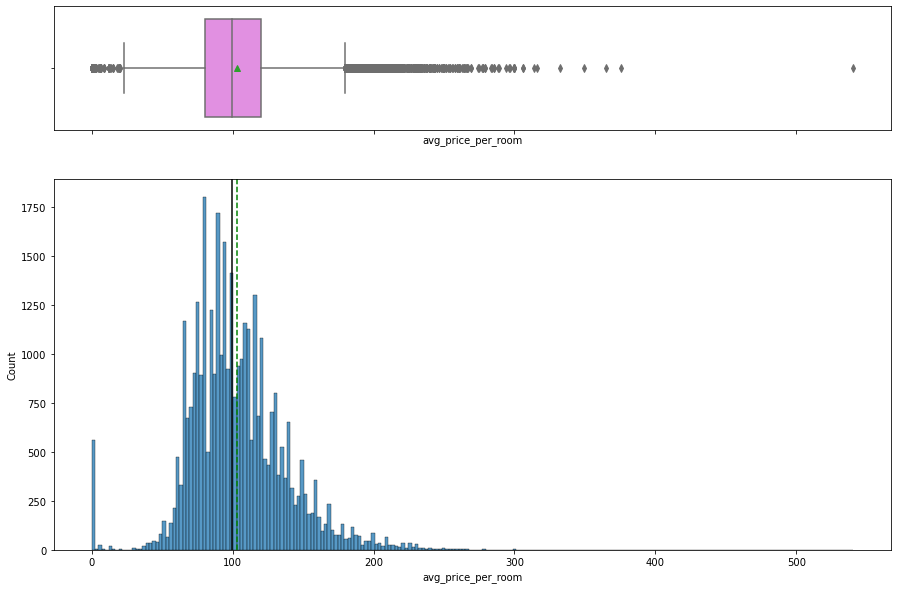

<IPython.core.display.Javascript object>

In [31]:
# histogram for Average price per day of the reservation; prices of the rooms are dynamic. (in euros)
# the data is numeric
histogram_boxplot(df, "avg_price_per_room")

#### Observations:
* Mean is around 103.4 and median 80
* There is outliers
* Median is smaller than mean
* Mean and Median difference is high, mean data is skewed, here  skewed to both sides.

In [32]:
df[df["avg_price_per_room"] == 0]

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
63,1,0,0,1,Meal Plan 1,0,Room_Type 1,2,2017,9,10,Complementary,0,0,0,0.00000,1,Not_Canceled
145,1,0,0,2,Meal Plan 1,0,Room_Type 1,13,2018,6,1,Complementary,1,3,5,0.00000,1,Not_Canceled
209,1,0,0,0,Meal Plan 1,0,Room_Type 1,4,2018,2,27,Complementary,0,0,0,0.00000,1,Not_Canceled
266,1,0,0,2,Meal Plan 1,0,Room_Type 1,1,2017,8,12,Complementary,1,0,1,0.00000,1,Not_Canceled
267,1,0,2,1,Meal Plan 1,0,Room_Type 1,4,2017,8,23,Complementary,0,0,0,0.00000,1,Not_Canceled
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35983,1,0,0,1,Meal Plan 1,0,Room_Type 7,0,2018,6,7,Complementary,1,4,17,0.00000,1,Not_Canceled
36080,1,0,1,1,Meal Plan 1,0,Room_Type 7,0,2018,3,21,Complementary,1,3,15,0.00000,1,Not_Canceled
36114,1,0,0,1,Meal Plan 1,0,Room_Type 1,1,2018,3,2,Online,0,0,0,0.00000,0,Not_Canceled
36217,2,0,2,1,Meal Plan 1,0,Room_Type 2,3,2017,8,9,Online,0,0,0,0.00000,2,Not_Canceled


<IPython.core.display.Javascript object>

In [33]:
df.loc[df["avg_price_per_room"] == 0, "market_segment_type"].value_counts()

Complementary    354
Online           191
Name: market_segment_type, dtype: int64

<IPython.core.display.Javascript object>

In [34]:
# Calculating the 25th quantile
Q1 = df["avg_price_per_room"].quantile(0.25)

# Calculating the 75th quantile
Q3 = df["avg_price_per_room"].quantile(
    0.25
)  ## calculate 75th quantile for average price per room

# Calculating IQR
IQR = Q3 - Q1

# Calculating value of upper whisker
Upper_Whisker = Q3 + 1.5 * IQR
Upper_Whisker

80.3

<IPython.core.display.Javascript object>

In [35]:
# assigning the outliers the value of upper whisker
df.loc[df["avg_price_per_room"] >= 500, "avg_price_per_room"] = Upper_Whisker

<IPython.core.display.Javascript object>

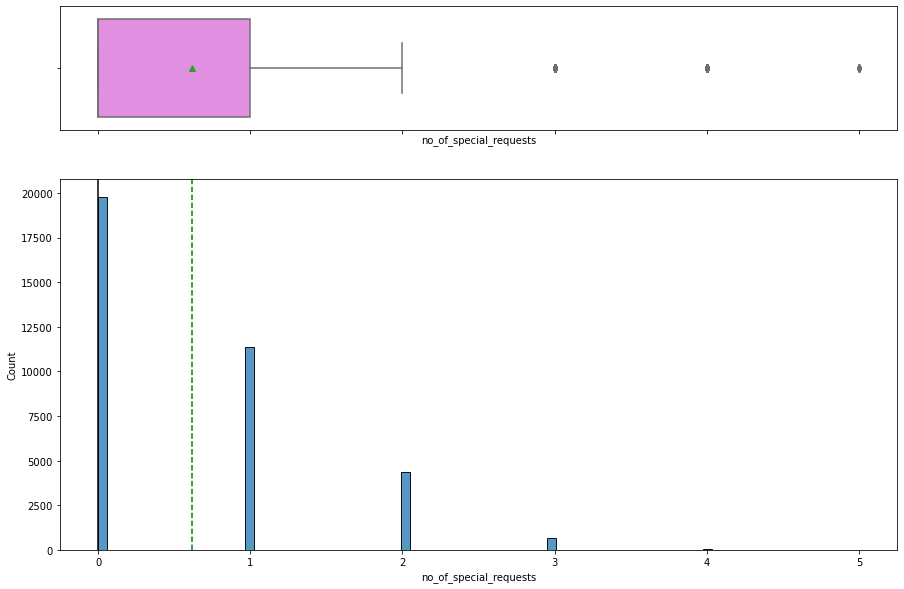

<IPython.core.display.Javascript object>

In [36]:
# histogram for Total number of special requests made by the customer
# the data is numeric
histogram_boxplot(df, "no_of_special_requests")

In [37]:
df["no_of_special_requests"].describe()

count   36275.00000
mean        0.61966
std         0.78624
min         0.00000
25%         0.00000
50%         0.00000
75%         1.00000
max         5.00000
Name: no_of_special_requests, dtype: float64

<IPython.core.display.Javascript object>

#### Observations:
* Mean is around .78 and median 0
* There is outliers
* Median is smaller than mean

### Observations on number of adults

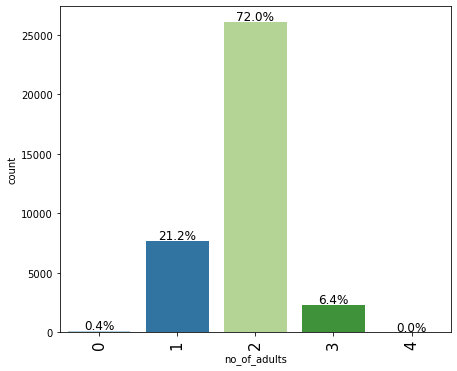

<IPython.core.display.Javascript object>

In [38]:
labeled_barplot(df, "no_of_adults", perc=True)

#### Observations:
* No of adults is mostly 2.
* Around 72% have 2 adults.

### Observations on types of meal plan

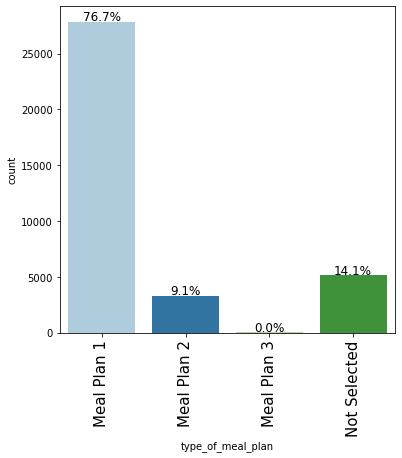

<IPython.core.display.Javascript object>

In [39]:
labeled_barplot(df, "type_of_meal_plan", perc=True)

#### Observations:
* Most people like Meal plan 2
*Around 76.7% like meal plan 2.

In [40]:
# Check unique meal plans
df["type_of_meal_plan"].value_counts()

Meal Plan 1     27835
Not Selected     5130
Meal Plan 2      3305
Meal Plan 3         5
Name: type_of_meal_plan, dtype: int64

<IPython.core.display.Javascript object>

#### Observations:
* 27835 people like meal plan 2

### Observations on number of children

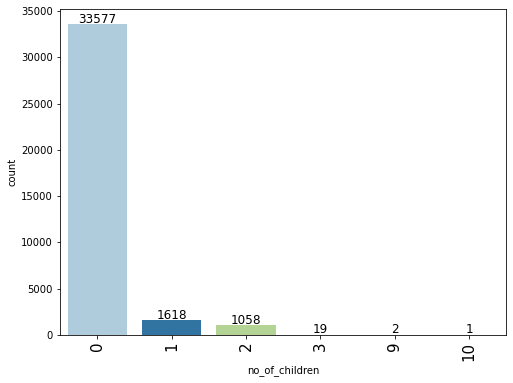

<IPython.core.display.Javascript object>

In [41]:
labeled_barplot(df, "no_of_children")

In [42]:
# replacing 9, and 10 children with 3
df["no_of_children"] = df["no_of_children"].replace([9, 10], 3)

<IPython.core.display.Javascript object>

### Observations on number of week nights

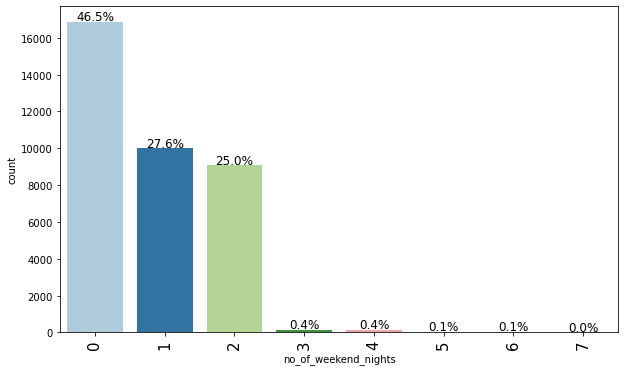

(array([0. , 0.2, 0.4, 0.6, 0.8, 1. ]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

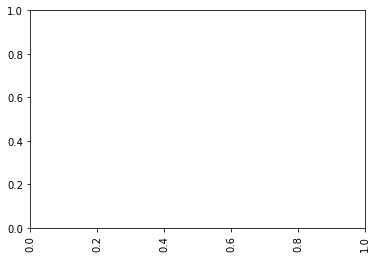

<IPython.core.display.Javascript object>

In [43]:
labeled_barplot(df, "no_of_weekend_nights", perc=True)
plt.xticks(rotation=90)  # To rotate the x axis lables

#### Observations:
* 27.6% spend 1weekend nights.

### Observations on required car parking space

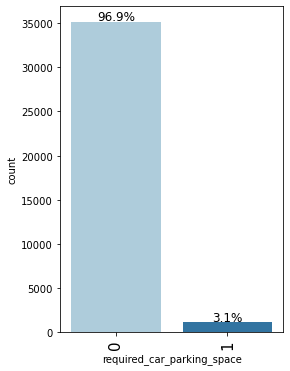

(array([0. , 0.2, 0.4, 0.6, 0.8, 1. ]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

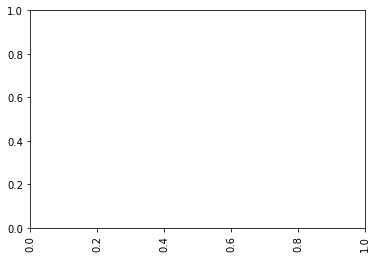

<IPython.core.display.Javascript object>

In [44]:
labeled_barplot(df, "required_car_parking_space", perc=True)
plt.xticks(rotation=90)  # To rotate the x axis lables

#### Observations:
* 96.9% needs no car parking space.

### Observations on type of room reserved

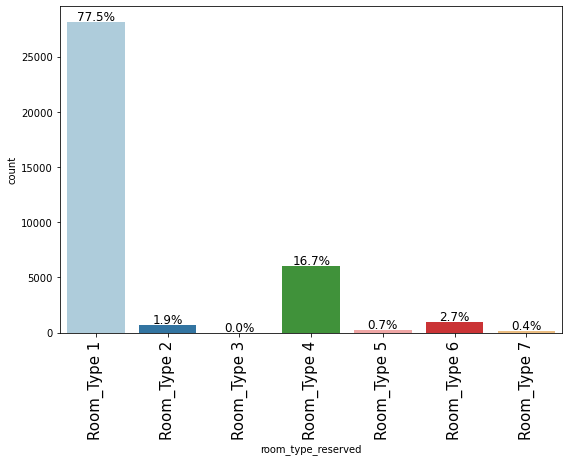

(array([0. , 0.2, 0.4, 0.6, 0.8, 1. ]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

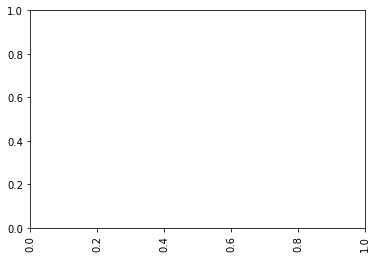

<IPython.core.display.Javascript object>

In [45]:
labeled_barplot(df, "room_type_reserved", perc=True)
plt.xticks(rotation=90)  # To rotate the x axis lables

#### Observations:
* 77.5% like Room type1

In [46]:
# Check unique Type of room reserved by the customer
df["room_type_reserved"].value_counts()

Room_Type 1    28130
Room_Type 4     6057
Room_Type 6      966
Room_Type 2      692
Room_Type 5      265
Room_Type 7      158
Room_Type 3        7
Name: room_type_reserved, dtype: int64

<IPython.core.display.Javascript object>

#### Observations:
* 28130 people like Room type1

### Observations on market segment type

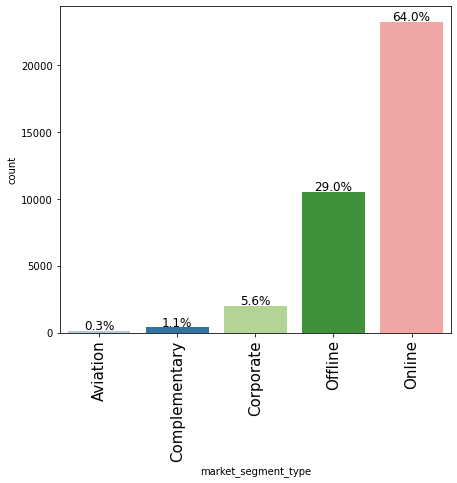

<IPython.core.display.Javascript object>

In [47]:
labeled_barplot(df, "market_segment_type", perc=True)


In [48]:
# Check unique Market segment designation:
df["market_segment_type"].value_counts()

Online           23214
Offline          10528
Corporate         2017
Complementary      391
Aviation           125
Name: market_segment_type, dtype: int64

<IPython.core.display.Javascript object>

#### Observations:
* 23214 prefer online booking.

### Observations on Month of arrival date

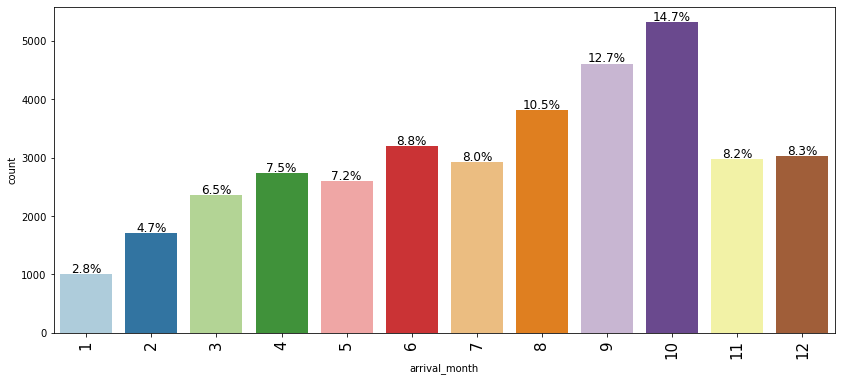

<IPython.core.display.Javascript object>

In [49]:
labeled_barplot(df, "arrival_month", perc=True)

#### Observations:
* 10th month has more customers.

### Observations on number of special requests

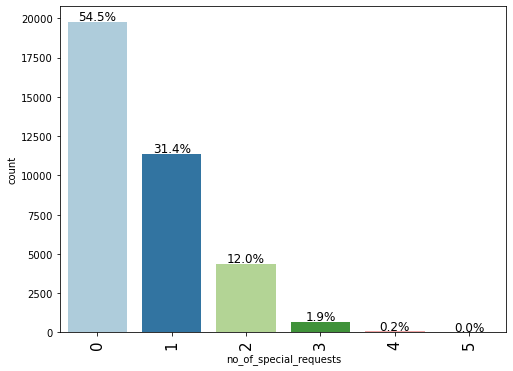

<IPython.core.display.Javascript object>

In [50]:
labeled_barplot(df, "no_of_special_requests", perc=True)

#### Observations:
* 54% of them didnt have special request.

### Observations on Booking status

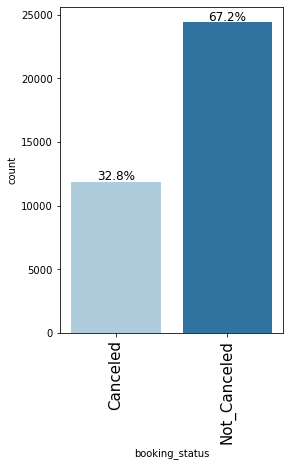

<IPython.core.display.Javascript object>

In [51]:
labeled_barplot(df, "booking_status", perc=True)

#### Observations:
* 67.2 % of them didnt cancel their booking.

### Encode Canceled bookings to 1 and Not_Canceled as 0 

In [52]:
df["booking_status"] = df["booking_status"].apply(lambda x: 1 if x == "Canceled" else 0)

<IPython.core.display.Javascript object>

## Bivariate Analysis

### Functions for further analysis

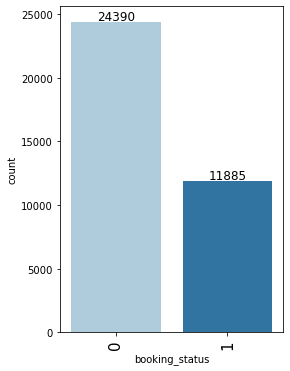

<IPython.core.display.Javascript object>

In [53]:
labeled_barplot(df, "booking_status", "no_of_adults")
# The data is numeric and we want to compare distributions across different categorical variables
plt.show()

#### Observations:
* 36275 bookings are done.

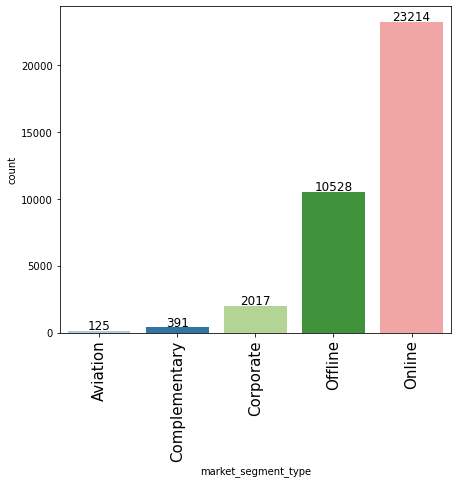

<IPython.core.display.Javascript object>

In [54]:
labeled_barplot(df, "market_segment_type", "avg_price_per_room")
# The data is numeric and we want to compare distributions across different categorical variables
plt.show()

#### Observations:
* Online booking is higher compared to all the other market segment.

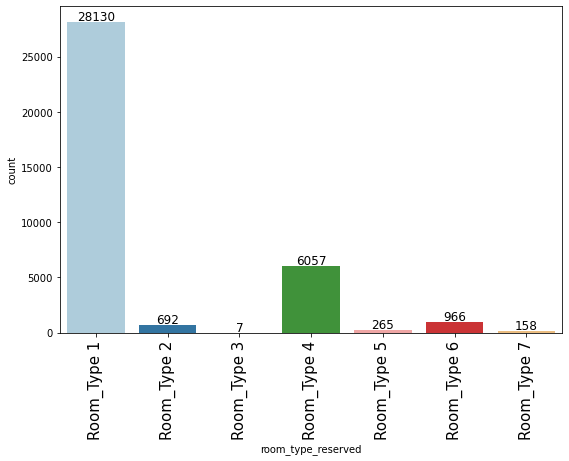

<IPython.core.display.Javascript object>

In [55]:
labeled_barplot(df, "room_type_reserved", "no_of_adults")
# The data is numeric and we want to compare distributions across different categorical variables
plt.show()

#### Observations:
* 28130 adults booked room type 1.

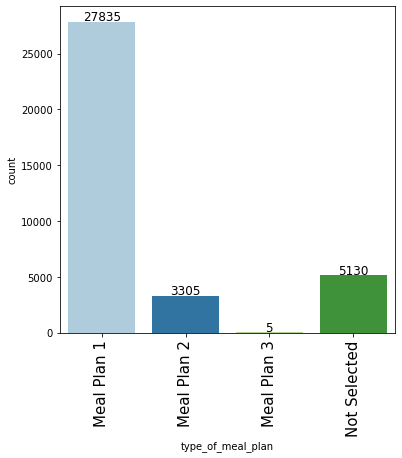

<IPython.core.display.Javascript object>

In [56]:
labeled_barplot(df, "type_of_meal_plan", "no_of_adults")
# The data is numeric and we want to compare distributions across different categorical variables

#### Observations:
* 27835 adults  requested for meal plan 1.

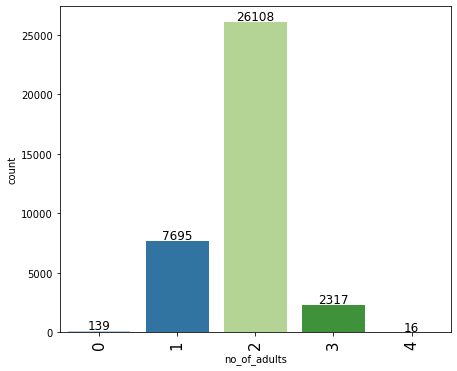

<IPython.core.display.Javascript object>

In [57]:
labeled_barplot(df, "no_of_adults", "no_of_children")
# The data is numeric and we want to compare distributions across different categorical variable

#### Observations:
* Most of the booking customers have 2 children.

### Heatplot

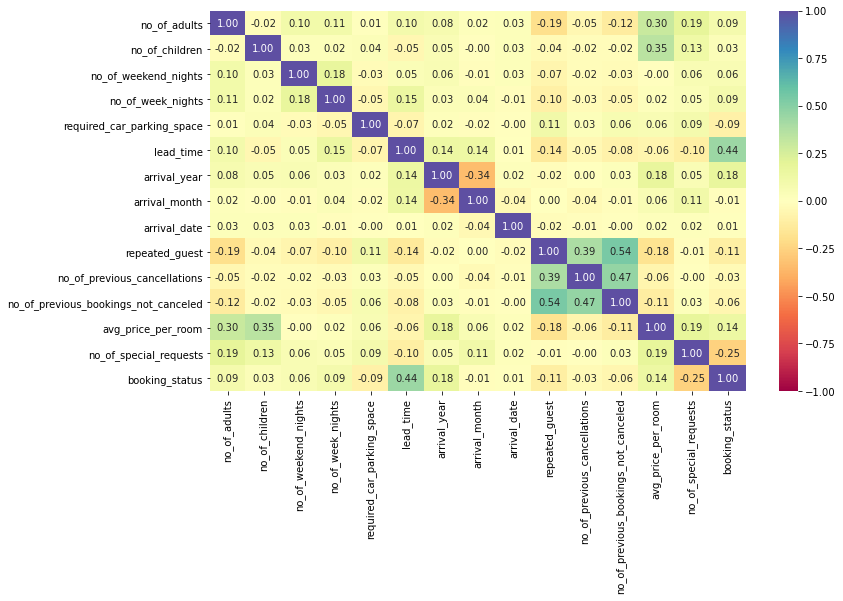

<IPython.core.display.Javascript object>

In [58]:
cols_list = df.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(12, 7))
sns.heatmap(
    df[cols_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()

#### Observations:
* repeated_guest and no_of _previous _booking _not _cancelled are moderately-positively correlated (.54).
* no_of_previous_cancellations and no_of _previous _booking _not _cancelled are moderately-positively correlated (.47).
* lead_time and booking_status are moderately-positively correlated (.44). 
* arrival_month and arrival_year are negatively correlated (-0.34).

## Pairplot

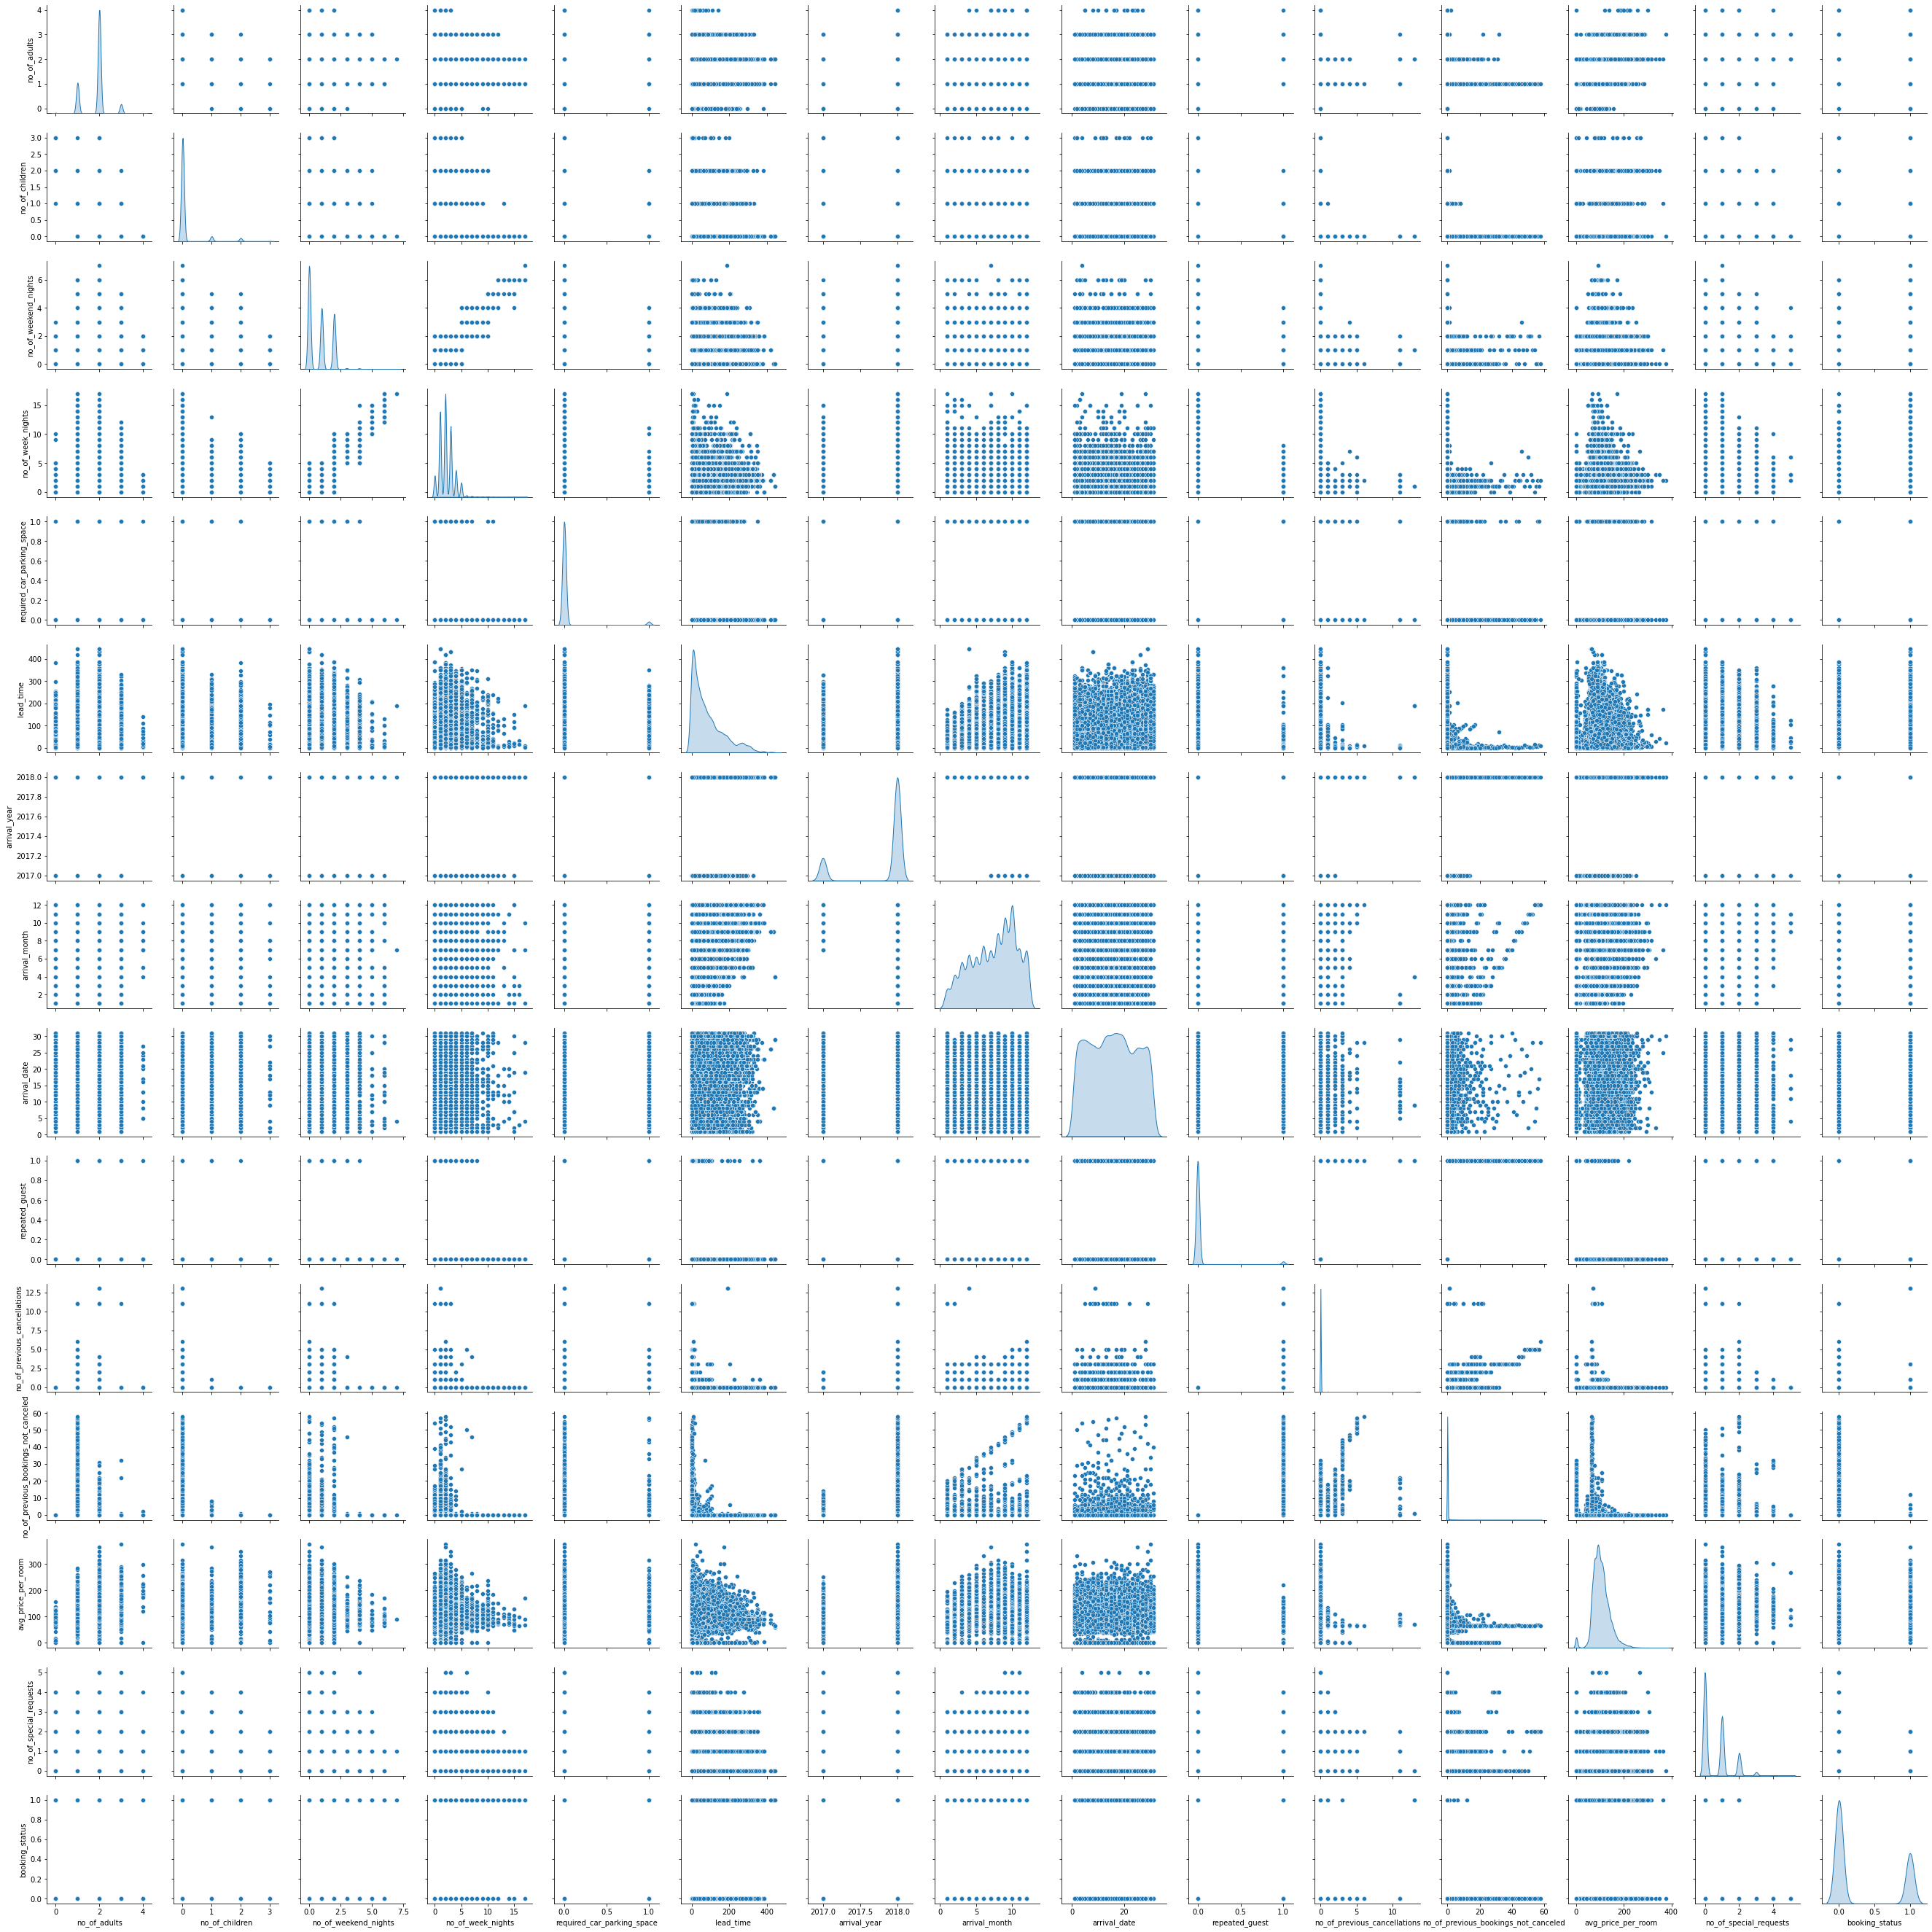

<IPython.core.display.Javascript object>

In [59]:
sns.pairplot(df, diag_kind="kde")

### 1. What are the busiest months in the hotel?


In [60]:
# grouping the data on arrival months and extracting the count of bookings
monthly_data = df.groupby(["arrival_month"])["booking_status"].count()


<IPython.core.display.Javascript object>

In [61]:
# creating a dataframe with months and count of customers in each month
monthly_data = pd.DataFrame(
    {"Month": list(monthly_data.index), "Total_Guests": list(monthly_data.values)}
)

<IPython.core.display.Javascript object>

In [62]:
monthly_data

,Month,Total_Guests
0,1,1014
1,2,1704
2,3,2358
3,4,2736
4,5,2598
5,6,3203
6,7,2920
7,8,3813
8,9,4611
9,10,5317


<IPython.core.display.Javascript object>

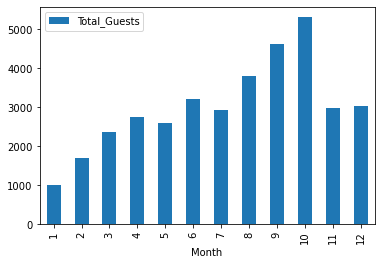

<IPython.core.display.Javascript object>

In [63]:
# Create bar plot
monthly_data.plot(x="Month", y="Total_Guests", kind="bar")
plt.show()

#### Observations:
* October has the most number of guest(5317).

 ## Prices vary across different months

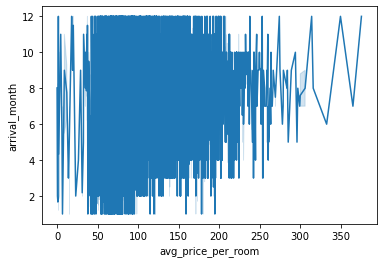

<IPython.core.display.Javascript object>

In [64]:

sns.lineplot(x="avg_price_per_room", y="arrival_month",data=df)  
##  lineplot between average price per room and arrival month
plt.show()


### 2. Which market segment do most of the guests come from?

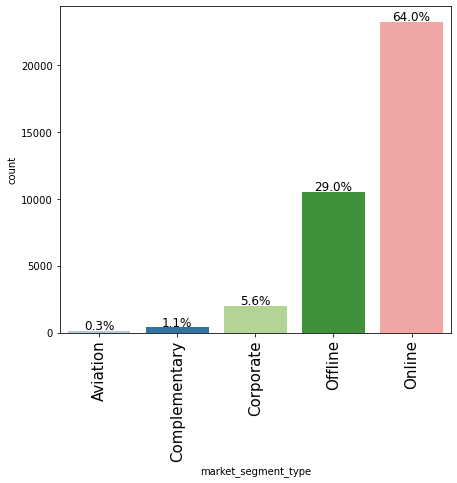

<IPython.core.display.Javascript object>

In [65]:
labeled_barplot(df, "market_segment_type", perc=True)

In [66]:
# Check unique Market segment designation:
df["market_segment_type"].value_counts()

Online           23214
Offline          10528
Corporate         2017
Complementary      391
Aviation           125
Name: market_segment_type, dtype: int64

<IPython.core.display.Javascript object>

#### Observations:
* Most of the guests come from online market segment.

### 3.  Hotel rates are dynamic and change according to demand and customer demographics. What are the differences in room prices in different market segments?


<Figure size 720x432 with 0 Axes>

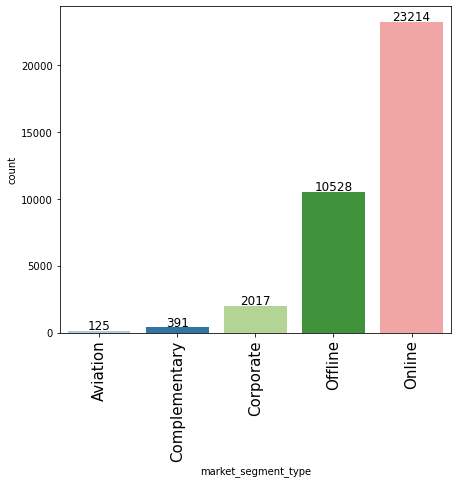

<IPython.core.display.Javascript object>

In [67]:

plt.figure(figsize=(10, 6))
labeled_barplot(df, "market_segment_type", "avg_price_per_room")

plt.show()


#### Observations:
* Avg price per room for online order is 23214.
* Avg price per room for offline order is 10528.
* Avg price per room for corporate order is 2017.
* Avg price per room for complementary order is 391.
* Avg price per room for aviation order is 125.


### How booking status varies across different market segments. How average price per room impacts booking status.

booking_status           0      1    All
market_segment_type                     
All                  24390  11885  36275
Online               14739   8475  23214
Offline               7375   3153  10528
Corporate             1797    220   2017
Aviation                88     37    125
Complementary          391      0    391
------------------------------------------------------------------------------------------------------------------------


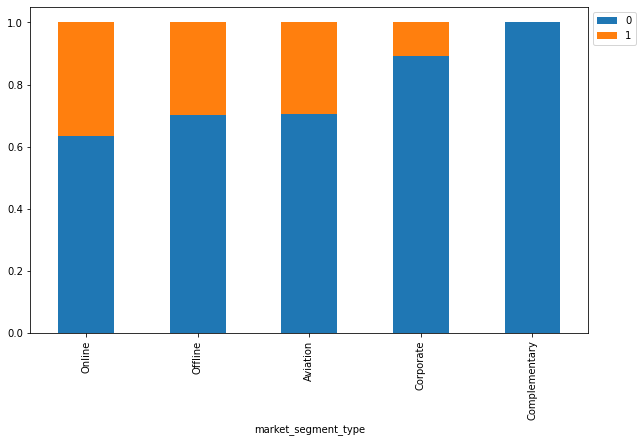

<IPython.core.display.Javascript object>

In [68]:
stacked_barplot(df, "market_segment_type", "booking_status")
## how booking status varies across different market segments.

### 4. What percentage of bookings are canceled? 


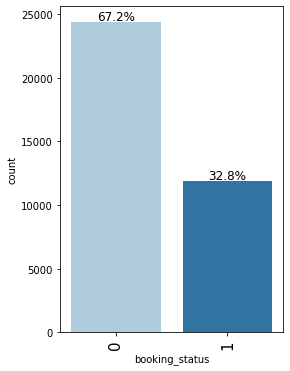

<IPython.core.display.Javascript object>

In [69]:
labeled_barplot(df, "booking_status", perc=True)

booking_status      0      1    All
arrival_month                      
All             24390  11885  36275
10               3437   1880   5317
9                3073   1538   4611
8                2325   1488   3813
7                1606   1314   2920
6                1912   1291   3203
4                1741    995   2736
5                1650    948   2598
11               2105    875   2980
3                1658    700   2358
2                1274    430   1704
12               2619    402   3021
1                 990     24   1014
------------------------------------------------------------------------------------------------------------------------


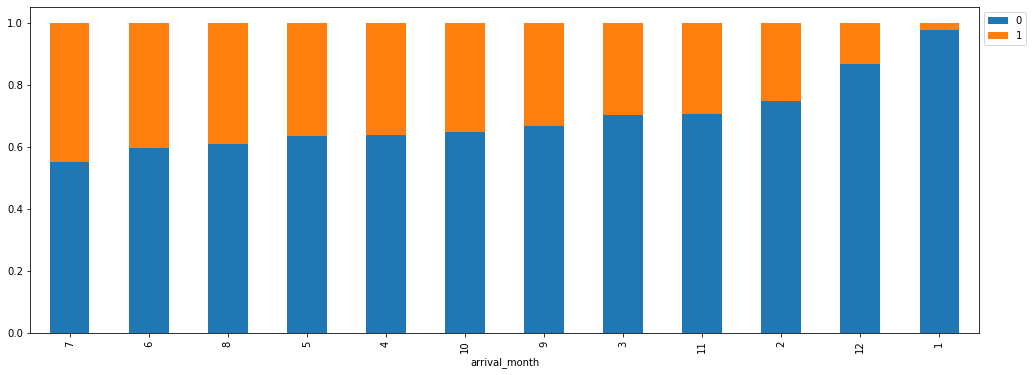

<IPython.core.display.Javascript object>

In [70]:
stacked_barplot(df, "arrival_month", "booking_status")
##  plot stacked barplot for arrival month and booking status

### Observations:
* 67.2%  

### 5. Repeating guests are the guests who stay in the hotel often and are important to brand equity. What percentage of repeating guests cancel?

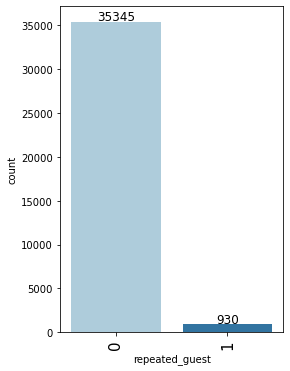

<IPython.core.display.Javascript object>

In [71]:
labeled_barplot(df, "repeated_guest", "no_of_cancellation")
# The data is numeric and we want to compare distributions across different categorical variables
plt.show()

booking_status      0      1    All
repeated_guest                     
All             24390  11885  36275
0               23476  11869  35345
1                 914     16    930
------------------------------------------------------------------------------------------------------------------------


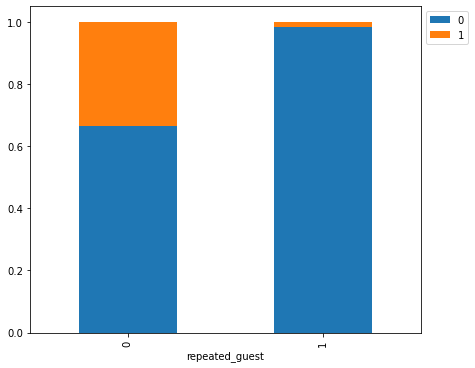

<IPython.core.display.Javascript object>

In [72]:
stacked_barplot(df, "repeated_guest", "booking_status")
## plot stacked barplot for repeated guests and booking status

### Observations:
35345 of cancellations happened when d 0 repeated requests 

### 6. Many guests have special requirements when booking a hotel room. Do these requirements affect booking cancellation?

booking_status              0      1    All
no_of_special_requests                     
All                     24390  11885  36275
0                       11232   8545  19777
1                        8670   2703  11373
2                        3727    637   4364
3                         675      0    675
4                          78      0     78
5                           8      0      8
------------------------------------------------------------------------------------------------------------------------


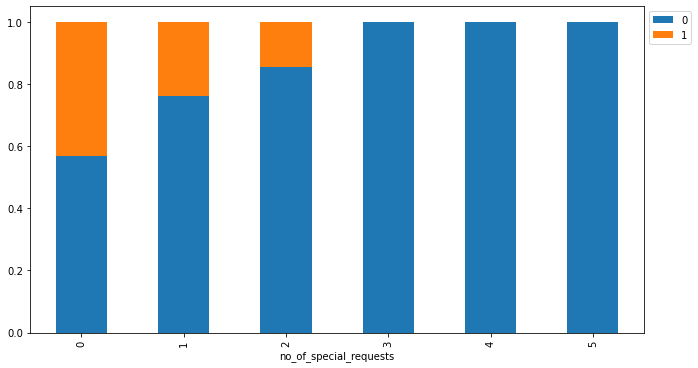

<IPython.core.display.Javascript object>

In [73]:
stacked_barplot(df, "no_of_special_requests", "booking_status")
##  plot stacked barplot for no of special requests and booking status

#### Observations:
* More special requests during the booking process may help reduce the chance of a guest cancelling their booking.

### Does special requests made by the customers impacts the prices of a room?

<Figure size 720x432 with 0 Axes>

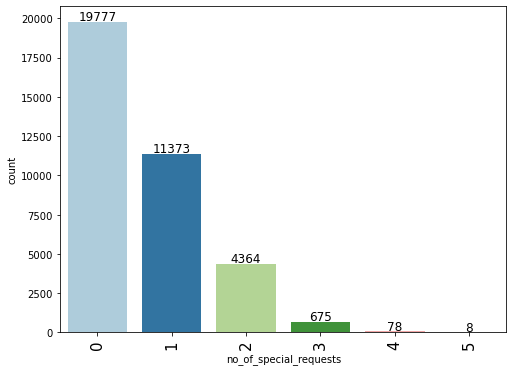

<IPython.core.display.Javascript object>

In [74]:
plt.figure(figsize=(10, 6))
labeled_barplot(df, "no_of_special_requests", "avg_price_per_room")

plt.show()

## Booking status and average price per room

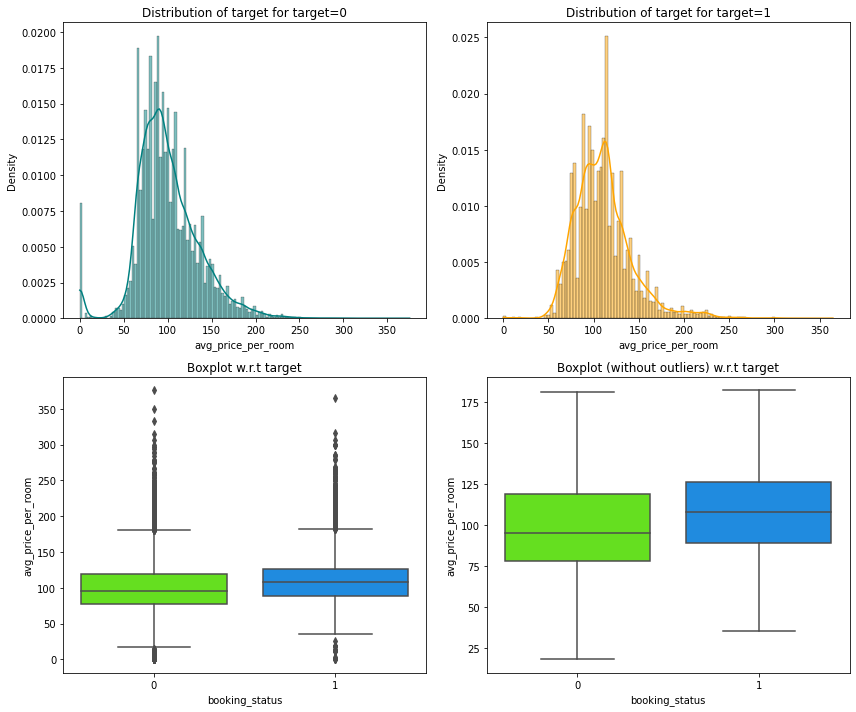

<IPython.core.display.Javascript object>

In [75]:
distribution_plot_wrt_target(df, "avg_price_per_room", "booking_status")


## Customer who stay for at least a day at the hotel

In [76]:
stay_df = df[(df["no_of_week_nights"] > 0) & (df["no_of_weekend_nights"] > 0)]
stay_df.shape

(17094, 18)

<IPython.core.display.Javascript object>

In [77]:
stay_df["total_days"] = stay_df["no_of_week_nights"] + stay_df["no_of_weekend_nights"]
stay_df["total_days"]

0        3
1        5
2        3
4        2
6        4
        ..
36266    4
36270    8
36271    4
36272    8
36274    3
Name: total_days, Length: 17094, dtype: int64

<IPython.core.display.Javascript object>

 ## Percentage of repeating guests cancel.

booking_status      0      1    All
repeated_guest                     
All             24390  11885  36275
0               23476  11869  35345
1                 914     16    930
------------------------------------------------------------------------------------------------------------------------


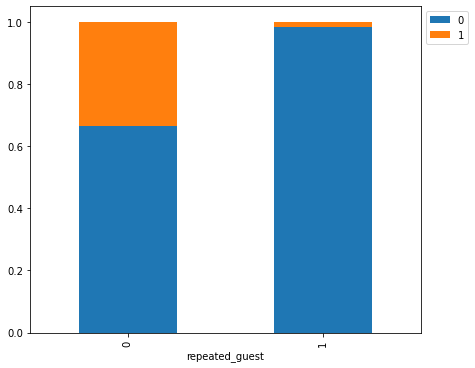

<IPython.core.display.Javascript object>

In [78]:
stacked_barplot(df, "repeated_guest", "booking_status")
##repeated guests and booking status

## Outlier Check

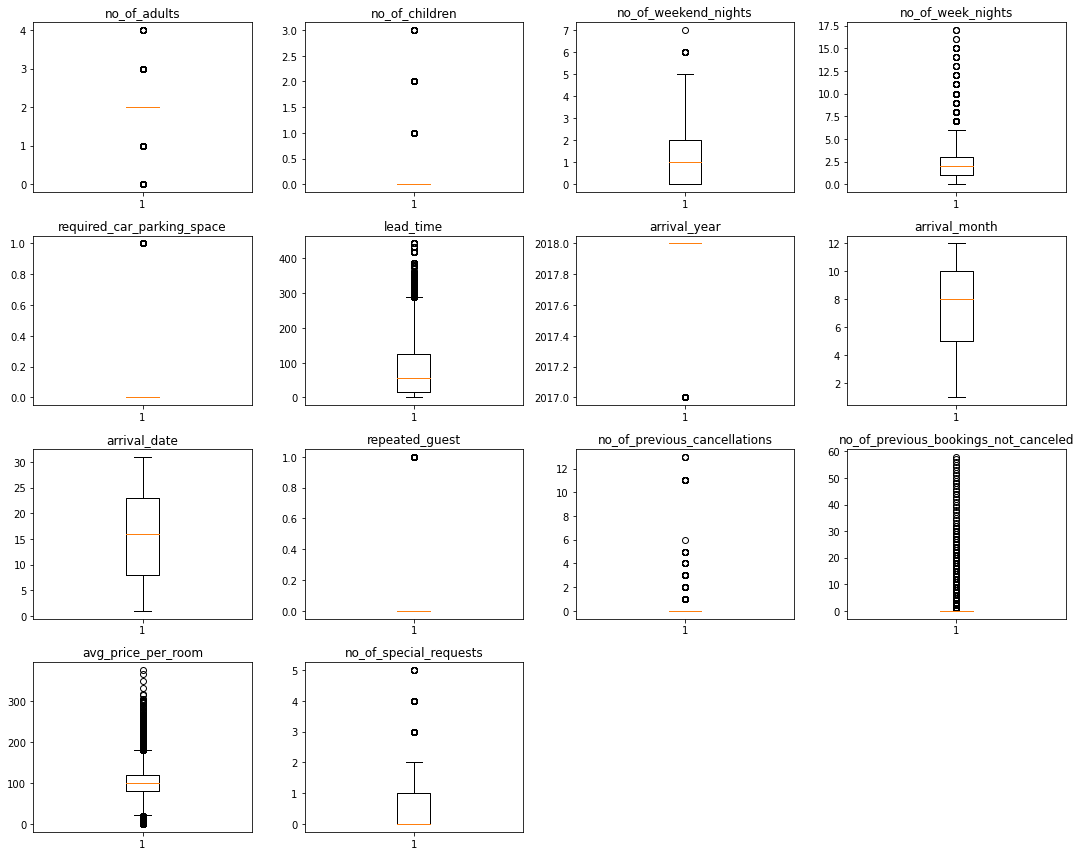

<IPython.core.display.Javascript object>

In [79]:
# outlier detection using boxplot
numeric_columns = df.select_dtypes(include=np.number).columns.tolist()
# dropping release_year as it is a temporal variable
numeric_columns.remove("booking_status")

plt.figure(figsize=(15, 12))

for i, variable in enumerate(numeric_columns):
    plt.subplot(4, 4, i + 1)
    plt.boxplot(df[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

## Data Preparation for modeling building

In [80]:
X = df.drop(["booking_status"], axis=1)
Y = df["booking_status"]

X = pd.get_dummies(X, drop_first=True)  ## Complete the code to create dummies for X

# Splitting data in train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.30, random_state=1
)  ## Complete the code to split the data into train test in the ratio 70:30 with random_state = 1

<IPython.core.display.Javascript object>

In [81]:
print("Shape of Training set : ", X_train.shape)
print("Shape of test set : ", X_test.shape)
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Shape of Training set :  (25392, 27)
Shape of test set :  (10883, 27)
Percentage of classes in training set:
0   0.67064
1   0.32936
Name: booking_status, dtype: float64
Percentage of classes in test set:
0   0.67638
1   0.32362
Name: booking_status, dtype: float64


<IPython.core.display.Javascript object>

### Model evaluation criterion

### Model can make wrong predictions as:

1. Predicting a customer will not cancel their booking but in reality, the customer will cancel their booking.
2. Predicting a customer will cancel their booking but in reality, the customer will not cancel their booking. 

### Which case is more important? 
* Both the cases are important as:

* If we predict that a booking will not be canceled and the booking gets canceled then the hotel will lose resources and will have to bear additional costs of distribution channels.

* If we predict that a booking will get canceled and the booking doesn't get canceled the hotel might not be able to provide satisfactory services to the customer by assuming that this booking will be canceled. This might damage the brand equity. 



### How to reduce the losses?

* Hotel would want `F1 Score` to be maximized, greater the F1  score higher are the chances of minimizing False Negatives and False Positives. 

## Calculate different metrics and confusion matrix 

In [82]:
# defining a function to compute different metrics to check performance of a classification model built using statsmodels
def model_performance_classification_statsmodels(
    model, predictors, target, threshold=0.5
):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """

    # checking which probabilities are greater than threshold
    pred_temp = model.predict(predictors) > threshold
    # rounding off the above values to get classes
    pred = np.round(pred_temp)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

<IPython.core.display.Javascript object>

In [83]:
# defining a function to plot the confusion_matrix of a classification model


def confusion_matrix_statsmodels(model, predictors, target, threshold=0.5):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """
    y_pred = model.predict(predictors) > threshold
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

<IPython.core.display.Javascript object>

In [84]:
X = df.drop(["booking_status"], axis=1)
Y = df["booking_status"]

# adding constant
X = sm.add_constant(X)  ## Complete the code to add constant to X

X = pd.get_dummies(X, drop_first=True)  ## Complete the code to create dummies for X

# Splitting data in train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.30, random_state=1
)  ## Complete the code to split the data into train test in the ratio 70:30 with random_state = 1

<IPython.core.display.Javascript object>

In [85]:
# fitting logistic regression model
logit = sm.Logit(y_train, X_train.astype(float))
lg = logit.fit(disp=False)  ## Complete the code to fit logistic regression

print(lg.summary())  ## Complete the code to print summary of the model

                           Logit Regression Results                           
Dep. Variable:         booking_status   No. Observations:                25392
Model:                          Logit   Df Residuals:                    25364
Method:                           MLE   Df Model:                           27
Date:                Thu, 16 Jun 2022   Pseudo R-squ.:                  0.3291
Time:                        16:24:08   Log-Likelihood:                -10795.
converged:                      False   LL-Null:                       -16091.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
const                                 -924.4334    120.823     -7.651      0.000   -1161.242    -687.625
no_of_adults                             0.1141      

<IPython.core.display.Javascript object>

In [86]:
print("Training performance:")
model_performance_classification_statsmodels(lg, X_train, y_train)

Training performance:


,Accuracy,Recall,Precision,F1
0,0.80604,0.63410,0.73982,0.68289


<IPython.core.display.Javascript object>

#### Observations:


## Multicollinearity

In [87]:
# we will define a function to check VIF
def checking_vif(predictors):
    vif = pd.DataFrame()
    vif["feature"] = predictors.columns

    # calculating VIF for each feature
    vif["VIF"] = [
        variance_inflation_factor(predictors.values, i)
        for i in range(len(predictors.columns))
    ]
    return vif

<IPython.core.display.Javascript object>

In [88]:
checking_vif(X_train)

,feature,VIF
0,const,39497483.90869
1,no_of_adults,1.35110
2,no_of_children,2.09360
3,no_of_weekend_nights,1.06946
4,no_of_week_nights,1.09570
5,required_car_parking_space,1.03998
6,lead_time,1.39513
7,arrival_year,1.43190
8,arrival_month,1.27642
9,arrival_date,1.00679


<IPython.core.display.Javascript object>

### Dropping high p-value variables

- We will drop the predictor variables having a p-value greater than 0.05 as they do not significantly impact the target variable.
- But sometimes p-values change after dropping a variable. So, we'll not drop all variables at once.
- Instead, we will do the following:
    - Build a model, check the p-values of the variables, and drop the column with the highest p-value.
    - Create a new model without the dropped feature, check the p-values of the variables, and drop the column with the highest p-value.
    - Repeat the above two steps till there are no columns with p-value > 0.05.

The above process can also be done manually by picking one variable at a time that has a high p-value, dropping it, and building a model again. But that might be a little tedious and using a loop will be more efficient.

In [89]:
# initial list of columns
cols = X_train.columns.tolist()

# setting an initial max p-value
max_p_value = 1

while len(cols) > 0:
    # defining the train set
    x_train_aux = X_train[cols]

    # fitting the model
    model = sm.Logit(y_train, x_train_aux).fit(disp=False)

    # getting the p-values and the maximum p-value
    p_values = model.pvalues
    max_p_value = max(p_values)

    # name of the variable with maximum p-value
    feature_with_p_max = p_values.idxmax()

    if max_p_value > 0.05:
        cols.remove(feature_with_p_max)
    else:
        break

selected_features = cols
print(selected_features)

['const', 'no_of_adults', 'no_of_children', 'no_of_weekend_nights', 'no_of_week_nights', 'required_car_parking_space', 'lead_time', 'arrival_year', 'arrival_month', 'repeated_guest', 'no_of_previous_cancellations', 'avg_price_per_room', 'no_of_special_requests', 'type_of_meal_plan_Meal Plan 2', 'type_of_meal_plan_Not Selected', 'room_type_reserved_Room_Type 2', 'room_type_reserved_Room_Type 4', 'room_type_reserved_Room_Type 5', 'room_type_reserved_Room_Type 6', 'room_type_reserved_Room_Type 7', 'market_segment_type_Corporate', 'market_segment_type_Offline']


<IPython.core.display.Javascript object>

In [90]:
X_train1 = X_train[selected_features]
X_test1 = X_test[selected_features]

<IPython.core.display.Javascript object>

In [91]:
logit1 = sm.Logit(y_train, X_train1.astype(float)) ## Complete the code to train logistic regression on X_train1 and y_train
lg1 = logit1.fit(disp=False) ## Complete the code to fit logistic regression
print(lg1.summary()) ## Complete the code to print summary of the model


                           Logit Regression Results                           
Dep. Variable:         booking_status   No. Observations:                25392
Model:                          Logit   Df Residuals:                    25370
Method:                           MLE   Df Model:                           21
Date:                Thu, 16 Jun 2022   Pseudo R-squ.:                  0.3281
Time:                        16:24:09   Log-Likelihood:                -10812.
converged:                       True   LL-Null:                       -16091.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                           -917.1935    120.462     -7.614      0.000   -1153.294    -681.093
no_of_adults                       0.1092      0.037      2.926      0.

<IPython.core.display.Javascript object>

In [92]:
print("Training performance:")
model_performance_classification_statsmodels(
    lg1, X_train1, y_train
)  ## Complete the code to check performance on X_train1 and y_train

Training performance:


,Accuracy,Recall,Precision,F1
0,0.80549,0.63267,0.73917,0.68179


<IPython.core.display.Javascript object>

###  Converting coefficients to odds
* The coefficients of the logistic regression model are in terms of log(odd), to find the odds we have to take the exponential of the coefficients. 
* Therefore, **odds =  exp(b)**
* The percentage change in odds is given as **odds = (exp(b) - 1) * 100**

In [93]:
# converting coefficients to odds
odds = np.exp(lg1.params)

# finding the percentage change
perc_change_odds = (np.exp(lg1.params) - 1) * 100

# removing limit from number of columns to display
pd.set_option("display.max_columns", None)

# adding the odds to a dataframe
pd.DataFrame({"Odds": odds, "Change_odd%": perc_change_odds}, index=X_train1.columns).T

,const,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,repeated_guest,no_of_previous_cancellations,avg_price_per_room,no_of_special_requests,type_of_meal_plan_Meal Plan 2,type_of_meal_plan_Not Selected,room_type_reserved_Room_Type 2,room_type_reserved_Room_Type 4,room_type_reserved_Room_Type 5,room_type_reserved_Room_Type 6,room_type_reserved_Room_Type 7,market_segment_type_Corporate,market_segment_type_Offline
Odds,0.00000,1.11538,1.16592,1.11449,1.04251,0.20307,1.01583,1.57316,0.95843,0.06475,1.25706,1.01933,0.23001,1.17917,1.33033,0.70080,0.75411,0.47932,0.38054,0.23899,0.45310,0.16779
Change_odd%,-100.00000,11.53816,16.59182,11.44938,4.25060,-79.69342,1.58275,57.31648,-4.15717,-93.52527,25.70553,1.93313,-76.99899,17.91675,33.03284,-29.91962,-24.58902,-52.06842,-61.94598,-76.10097,-54.68966,-83.22122


<IPython.core.display.Javascript object>

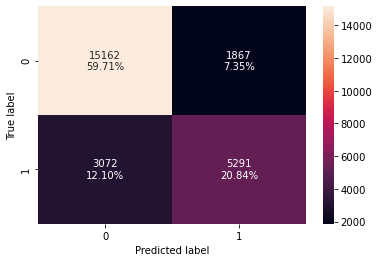

<IPython.core.display.Javascript object>

In [94]:
# creating confusion matrix
confusion_matrix_statsmodels(lg1, X_train1, y_train)

In [95]:
print("Training performance:")
log_reg_model_train_perf = model_performance_classification_statsmodels(
    lg1, X_test1, y_test
)  ## Complete the code to check performance on X_train1 and y_train
log_reg_model_train_perf

Training performance:


,Accuracy,Recall,Precision,F1
0,0.80465,0.63089,0.72900,0.67641


<IPython.core.display.Javascript object>

#### ROC-AUC
* ROC-AUC on training set

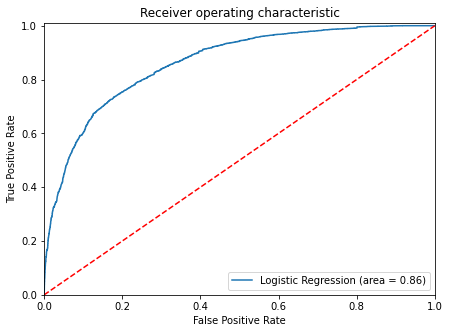

<IPython.core.display.Javascript object>

In [96]:
logit_roc_auc_train = roc_auc_score(y_train, lg1.predict(X_train1))
fpr, tpr, thresholds = roc_curve(y_train, lg1.predict(X_train1))
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label="Logistic Regression (area = %0.2f)" % logit_roc_auc_train)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.01])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

### Model Performance Improvement

### Optimal threshold using AUC-ROC curve

In [97]:
# Optimal threshold as per AUC-ROC curve
# The optimal cut off would be where tpr is high and fpr is low
fpr, tpr, thresholds = roc_curve(y_train, lg1.predict(X_train1))

optimal_idx = np.argmax(tpr - fpr)
optimal_threshold_auc_roc = thresholds[optimal_idx]
print(optimal_threshold_auc_roc)

0.3710932037990343


<IPython.core.display.Javascript object>

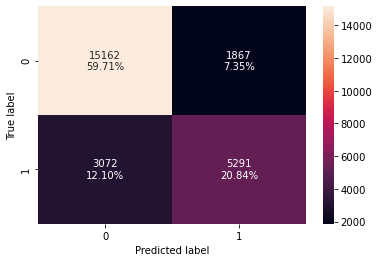

<IPython.core.display.Javascript object>

In [98]:
# creating confusion matrix
confusion_matrix_statsmodels(
    lg1, X_train1, y_train
)  ## Complete the code to create the confusion matrix for X_train1 and y_train with optimal_threshold_auc_roc as threshold

In [99]:
# checking model performance for this model
log_reg_model_train_perf_threshold_auc_roc = model_performance_classification_statsmodels(
    lg1, X_train1, y_train, threshold=optimal_threshold_auc_roc
)
print("Training performance:")
log_reg_model_train_perf_threshold_auc_roc

Training performance:


,Accuracy,Recall,Precision,F1
0,0.79281,0.73550,0.66859,0.70045


<IPython.core.display.Javascript object>

## Let's use Precision-Recall curve and see if we can find a better threshold

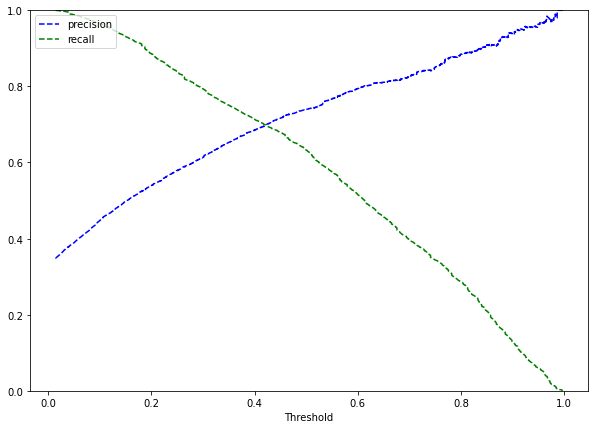

<IPython.core.display.Javascript object>

In [100]:
y_scores = lg1.predict(X_train1)
prec, rec, tre = precision_recall_curve(y_train, y_scores,)


def plot_prec_recall_vs_tresh(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="precision")
    plt.plot(thresholds, recalls[:-1], "g--", label="recall")
    plt.xlabel("Threshold")
    plt.legend(loc="upper left")
    plt.ylim([0, 1])


plt.figure(figsize=(10, 7))
plot_prec_recall_vs_tresh(prec, rec, tre)
plt.show()

In [101]:
# setting the threshold
optimal_threshold_curve = 0.42

<IPython.core.display.Javascript object>

### Checking model performance on training set

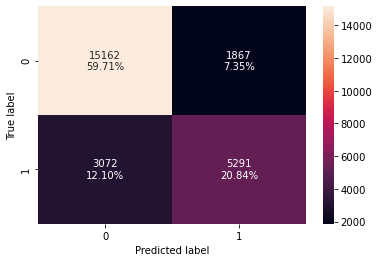

<IPython.core.display.Javascript object>

In [102]:
# creating confusion matrix
confusion_matrix_statsmodels(
    lg1, X_train1, y_train
)  ## Complete the code to create the confusion matrix for X_train1 and y_train with optimal_threshold_curve as threshold

In [103]:
log_reg_model_train_perf_threshold_curve = model_performance_classification_statsmodels(
    lg1, X_train1, y_train, threshold=optimal_threshold_curve
)
print("Training performance:")
log_reg_model_train_perf_threshold_curve

Training performance:


,Accuracy,Recall,Precision,F1
0,0.80124,0.69951,0.69776,0.69863


<IPython.core.display.Javascript object>

### Let's check the performance on the test set

**Using model with default threshold**

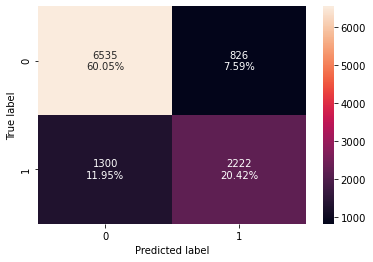

<IPython.core.display.Javascript object>

In [104]:
# creating confusion matrix
confusion_matrix_statsmodels(
    lg1, X_test1, y_test
)  ## Complete the code to create confusion matrix for X_test1 and y_test

In [105]:
log_reg_model_test_perf = model_performance_classification_statsmodels(
    lg1, X_test1, y_test
)  ## Complete the code to check performance on X_test1 and y_test

print("Test performance:")
log_reg_model_test_perf

Test performance:


,Accuracy,Recall,Precision,F1
0,0.80465,0.63089,0.72900,0.67641


<IPython.core.display.Javascript object>

* ROC curve on test set

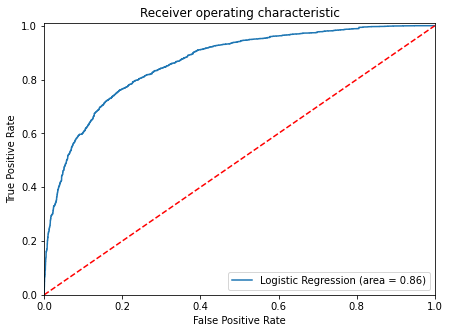

<IPython.core.display.Javascript object>

In [106]:
logit_roc_auc_train = roc_auc_score(y_test, lg1.predict(X_test1))
fpr, tpr, thresholds = roc_curve(y_test, lg1.predict(X_test1))
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label="Logistic Regression (area = %0.2f)" % logit_roc_auc_train)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.01])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

**Using model with threshold=0.37** 

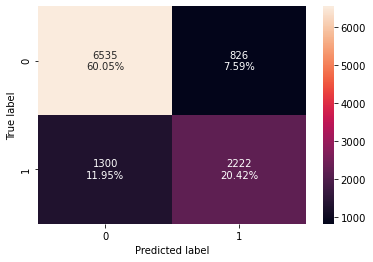

<IPython.core.display.Javascript object>

In [107]:
# creating confusion matrix
confusion_matrix_statsmodels(
    lg1, X_test1, y_test
)  ## Complete the code to create confusion matrix for X_test1 and y_test using optimal_threshold_auc_roc as threshold

In [108]:
# checking model performance for this model
log_reg_model_test_perf_threshold_auc_roc = model_performance_classification_statsmodels(
    lg1, X_test1, y_test, threshold=optimal_threshold_auc_roc
)
print("Test performance:")
log_reg_model_test_perf_threshold_auc_roc

Test performance:


,Accuracy,Recall,Precision,F1
0,0.79592,0.73935,0.66650,0.70104


<IPython.core.display.Javascript object>

**Using model with threshold = 0.42**

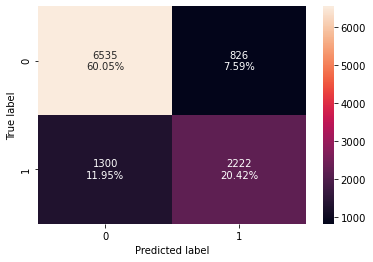

<IPython.core.display.Javascript object>

In [109]:
# creating confusion matrix
confusion_matrix_statsmodels(
    lg1, X_test1, y_test
)  ## Complete the code to create confusion matrix for X_test1 and y_test using optimal_threshold_curve as threshold

In [110]:
log_reg_model_test_perf_threshold_curve = model_performance_classification_statsmodels(
    lg1, X_test1, y_test, threshold=optimal_threshold_curve
)
print("Test performance:")
log_reg_model_test_perf_threshold_curve

Test performance:


,Accuracy,Recall,Precision,F1
0,0.80345,0.70358,0.69353,0.69852


<IPython.core.display.Javascript object>

### First, let's create functions to calculate different metrics and confusion matrix so that we don't have to use the same code repeatedly for each model.

In [111]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

<IPython.core.display.Javascript object>

In [112]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

<IPython.core.display.Javascript object>

### Model building - Decision Tree

In [113]:
model = DecisionTreeClassifier(random_state=1)
model.fit(X_train, y_train)  ## Complete the code to fit decision tree on train data

DecisionTreeClassifier(random_state=1)

<IPython.core.display.Javascript object>

#### Checking model performance on training set

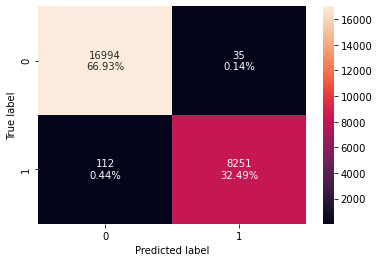

<IPython.core.display.Javascript object>

In [114]:
confusion_matrix_sklearn(
    model, X_train, y_train
)  ## Complete the code to create confusion matrix for train data

In [115]:
decision_tree_perf_train = model_performance_classification_sklearn(
    model, X_train, y_train
)
decision_tree_perf_train

,Accuracy,Recall,Precision,F1
0,0.99421,0.98661,0.99578,0.99117


<IPython.core.display.Javascript object>

### Checking model performance on test set

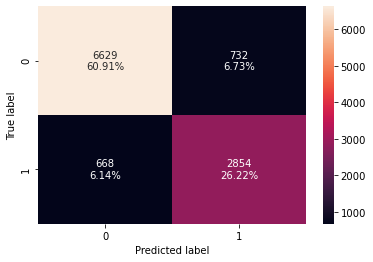

<IPython.core.display.Javascript object>

In [116]:
confusion_matrix_sklearn(
    model, X_test, y_test
)  ## Complete the code to create confusion matrix for test data

In [117]:
decision_tree_perf_test = model_performance_classification_sklearn(
    model, X_test, y_test
)  ## Complete the code to check performance on test set
decision_tree_perf_test

,Accuracy,Recall,Precision,F1
0,0.87136,0.81034,0.79587,0.80304


<IPython.core.display.Javascript object>

**Before pruning the tree let's check the important features.**

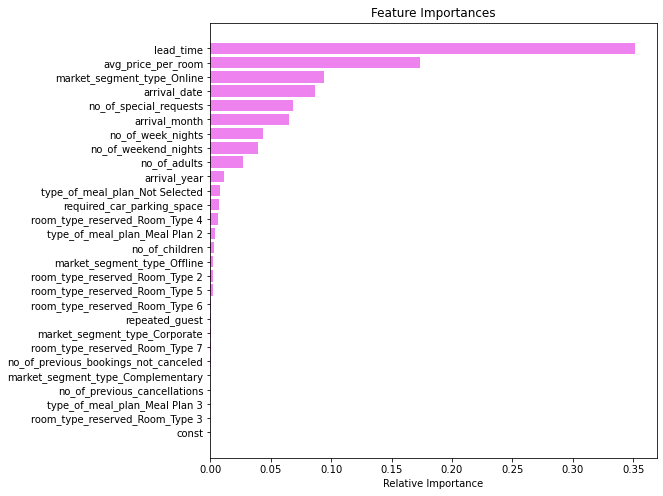

<IPython.core.display.Javascript object>

In [118]:
feature_names = list(X_train.columns)
importances = model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(8, 8))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

### Pruning the tree

**Pre-Pruning**

In [119]:
# Choose the type of classifier.
estimator = DecisionTreeClassifier(random_state=1, class_weight="balanced")

# Grid of parameters to choose from
parameters = {
    "max_depth": np.arange(2, 7, 2),
    "max_leaf_nodes": [50, 75, 150, 250],
    "min_samples_split": [10, 30, 50, 70],
}

# Type of scoring used to compare parameter combinations
acc_scorer = make_scorer(f1_score)

# Run the grid search
grid_obj = GridSearchCV(estimator, parameters, scoring=acc_scorer, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data.
estimator.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=6, max_leaf_nodes=50,
                       min_samples_split=10, random_state=1)

<IPython.core.display.Javascript object>

### Checking performance on training set

### Building a Logistic Regression model

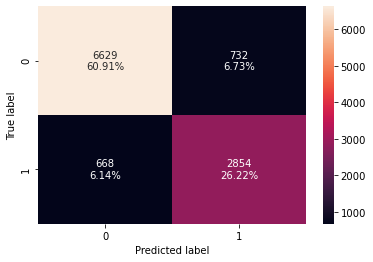

<IPython.core.display.Javascript object>

In [120]:
confusion_matrix_sklearn(
    model, X_test, y_test
)  ## Complete the code to create confusion matrix for train data

In [121]:
decision_tree_tune_perf_train = model_performance_classification_sklearn(
    model, X_test, y_test
)  ## Complete the code to check performance on train set
decision_tree_tune_perf_train

,Accuracy,Recall,Precision,F1
0,0.87136,0.81034,0.79587,0.80304


<IPython.core.display.Javascript object>

#### Observations:
* Accuracy of training set is 87%
* Recall rate is 81%

#### Checking performance on test set

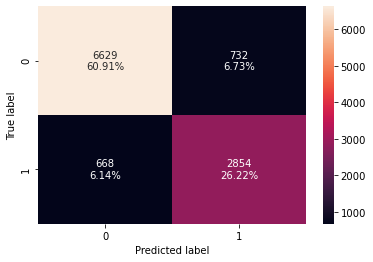

<IPython.core.display.Javascript object>

In [122]:
confusion_matrix_sklearn(
    model, X_test, y_test
)  ## Complete the code to create confusion matrix for test data

In [123]:
decision_tree_tune_perf_test = model_performance_classification_sklearn(
    model, X_test, y_test
)  ## Complete the code to check performance on test set
decision_tree_tune_perf_test

,Accuracy,Recall,Precision,F1
0,0.87136,0.81034,0.79587,0.80304


<IPython.core.display.Javascript object>

#### Observations:
* Accuracy for test is 87%
* Recall rate is 81%

## Visualizing the Decision Tree

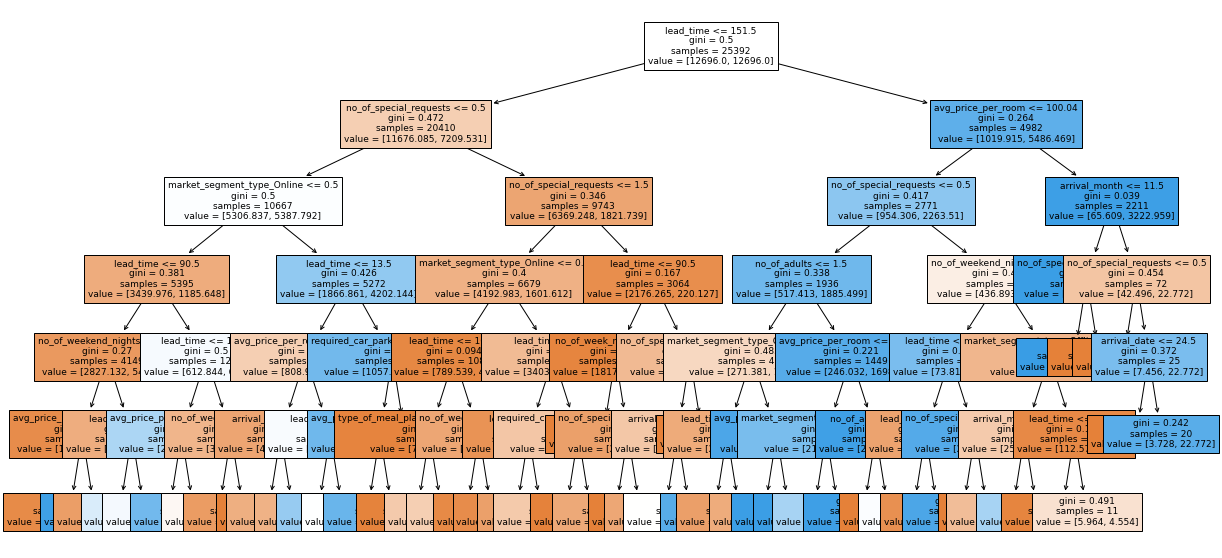

<IPython.core.display.Javascript object>

In [124]:
plt.figure(figsize=(20, 10))
out = tree.plot_tree(
    estimator,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
# below code will add arrows to the decision tree split if they are missing
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [125]:
# Text report showing the rules of a decision tree -
print(tree.export_text(estimator, feature_names=feature_names, show_weights=True))

|--- lead_time <= 151.50
|   |--- no_of_special_requests <= 0.50
|   |   |--- market_segment_type_Online <= 0.50
|   |   |   |--- lead_time <= 90.50
|   |   |   |   |--- no_of_weekend_nights <= 0.50
|   |   |   |   |   |--- avg_price_per_room <= 196.50
|   |   |   |   |   |   |--- weights: [1736.39, 133.59] class: 0
|   |   |   |   |   |--- avg_price_per_room >  196.50
|   |   |   |   |   |   |--- weights: [0.75, 24.29] class: 1
|   |   |   |   |--- no_of_weekend_nights >  0.50
|   |   |   |   |   |--- lead_time <= 68.50
|   |   |   |   |   |   |--- weights: [960.27, 223.16] class: 0
|   |   |   |   |   |--- lead_time >  68.50
|   |   |   |   |   |   |--- weights: [129.73, 160.92] class: 1
|   |   |   |--- lead_time >  90.50
|   |   |   |   |--- lead_time <= 117.50
|   |   |   |   |   |--- avg_price_per_room <= 93.58
|   |   |   |   |   |   |--- weights: [214.72, 227.72] class: 1
|   |   |   |   |   |--- avg_price_per_room >  93.58
|   |   |   |   |   |   |--- weights: [82.76, 285.41] 

<IPython.core.display.Javascript object>

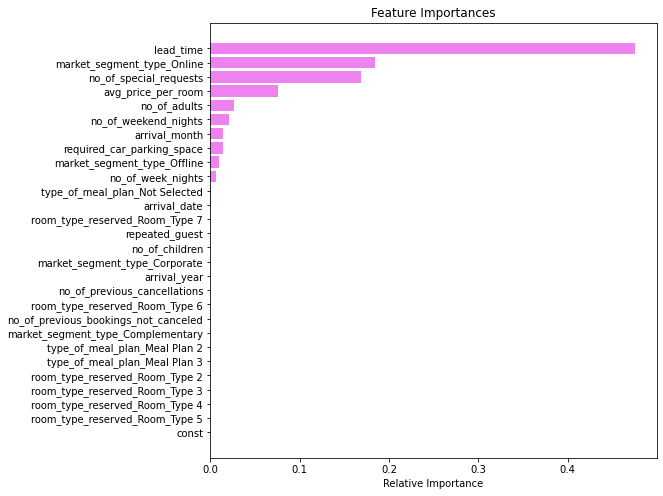

<IPython.core.display.Javascript object>

In [126]:
# importance of features in the tree building

importances = estimator.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(8, 8))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

## Cost Complexity Pruning

In [127]:
clf = DecisionTreeClassifier(random_state=1, class_weight="balanced")
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = abs(path.ccp_alphas), path.impurities

<IPython.core.display.Javascript object>

In [128]:
pd.DataFrame(path)

,ccp_alphas,impurities
0,0.00000,0.00838
1,-0.00000,0.00838
2,0.00000,0.00838
3,0.00000,0.00838
4,0.00000,0.00838
...,...,...
1841,0.00890,0.32806
1842,0.00980,0.33786
1843,0.01272,0.35058
1844,0.03412,0.41882


<IPython.core.display.Javascript object>

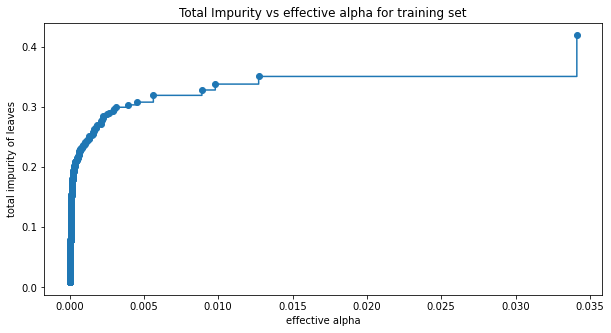

<IPython.core.display.Javascript object>

In [129]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")
plt.show()

Next, we train a decision tree using effective alphas. The last value
in ``ccp_alphas`` is the alpha value that prunes the whole tree,
leaving the tree, ``clfs[-1]``, with one node.

In [ ]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(
        random_state=1, ccp_alpha=ccp_alpha, class_weight="balanced"
    )
    clf.fit(
        X_train, y_train
    )  ## Complete the code to fit decision tree on training data
    clfs.append(clf)
print(
    "Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
        clfs[-1].tree_.node_count, ccp_alphas[-1]
    )
)

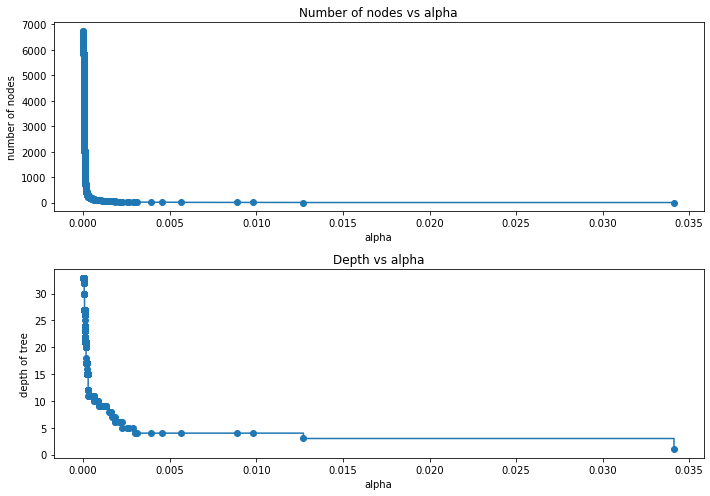

<IPython.core.display.Javascript object>

In [131]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1, figsize=(10, 7))
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

## F1 Score vs alpha for training and testing sets

In [ ]:
f1_train = []
for clf in clfs:
    pred_train = clf.predict(X_train)
    values_train = f1_score(y_train, pred_train)
    f1_train.append(values_train)

f1_test = []
for clf in clfs:
    pred_test = clf.predict(X_test)
    values_test = f1_score(y_test, pred_test)
    f1_test.append(values_test)

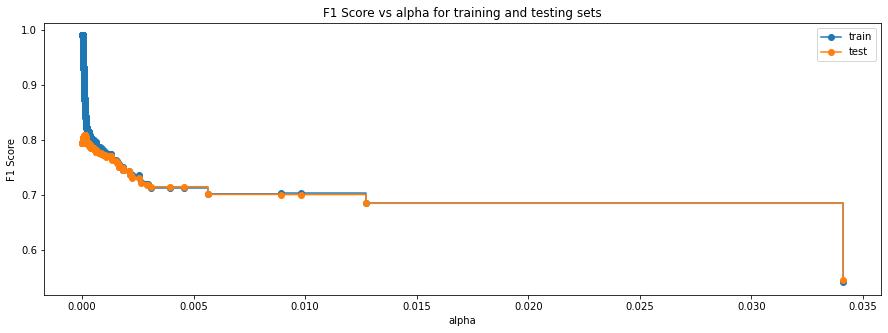

<IPython.core.display.Javascript object>

In [133]:
fig, ax = plt.subplots(figsize=(15, 5))
ax.set_xlabel("alpha")
ax.set_ylabel("F1 Score")
ax.set_title("F1 Score vs alpha for training and testing sets")
ax.plot(ccp_alphas, f1_train, marker="o", label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, f1_test, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

In [134]:
index_best_model = np.argmax(f1_test)
best_model = clfs[index_best_model]
print(best_model)

DecisionTreeClassifier(ccp_alpha=0.00012267633155167024,
                       class_weight='balanced', random_state=1)


<IPython.core.display.Javascript object>

#### Checking performance on training set

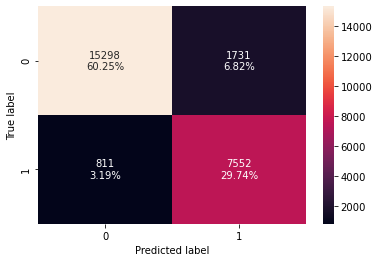

<IPython.core.display.Javascript object>

In [135]:
confusion_matrix_sklearn(best_model, X_train, y_train)

In [136]:
decision_tree_post_perf_train = model_performance_classification_sklearn(
    best_model, X_train, y_train
)
decision_tree_post_perf_train

,Accuracy,Recall,Precision,F1
0,0.89989,0.90303,0.81353,0.85594


<IPython.core.display.Javascript object>

#### Observations:
* Accuracy is 89%
* Recall rate is 90%

#### Checking performance on test set

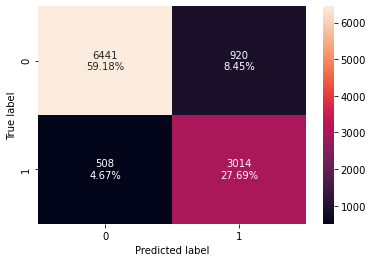

<IPython.core.display.Javascript object>

In [137]:
confusion_matrix_sklearn(
    best_model, X_test, y_test
)  ## Complete the code to create confusion matrix for test data on best model

In [138]:
decision_tree_post_test = model_performance_classification_sklearn(
    best_model, X_test, y_test
)  ## Complete the code to check performance of test set on best model
decision_tree_post_test

,Accuracy,Recall,Precision,F1
0,0.86879,0.85576,0.76614,0.80848


<IPython.core.display.Javascript object>

#### Observations:
* Accuracy for test is 86%
* Recall rate is 85%

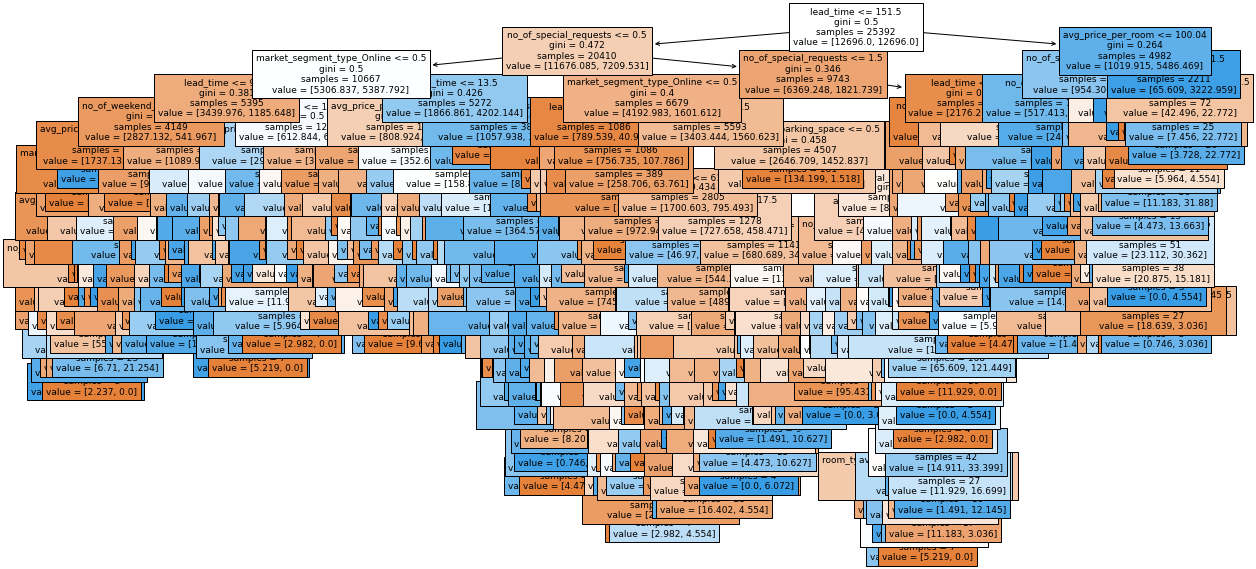

<IPython.core.display.Javascript object>

In [139]:
plt.figure(figsize=(20, 10))

out = tree.plot_tree(
    best_model,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [140]:
# Text report showing the rules of a decision tree -

print(tree.export_text(best_model, feature_names=feature_names, show_weights=True))

|--- lead_time <= 151.50
|   |--- no_of_special_requests <= 0.50
|   |   |--- market_segment_type_Online <= 0.50
|   |   |   |--- lead_time <= 90.50
|   |   |   |   |--- no_of_weekend_nights <= 0.50
|   |   |   |   |   |--- avg_price_per_room <= 196.50
|   |   |   |   |   |   |--- market_segment_type_Offline <= 0.50
|   |   |   |   |   |   |   |--- lead_time <= 16.50
|   |   |   |   |   |   |   |   |--- avg_price_per_room <= 68.50
|   |   |   |   |   |   |   |   |   |--- weights: [207.26, 10.63] class: 0
|   |   |   |   |   |   |   |   |--- avg_price_per_room >  68.50
|   |   |   |   |   |   |   |   |   |--- arrival_date <= 29.50
|   |   |   |   |   |   |   |   |   |   |--- no_of_adults <= 1.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 2
|   |   |   |   |   |   |   |   |   |   |--- no_of_adults >  1.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 5
|   |   |   |   |   |   |   |   |   |--- arrival_date >  29.50
|   |   |   |

<IPython.core.display.Javascript object>

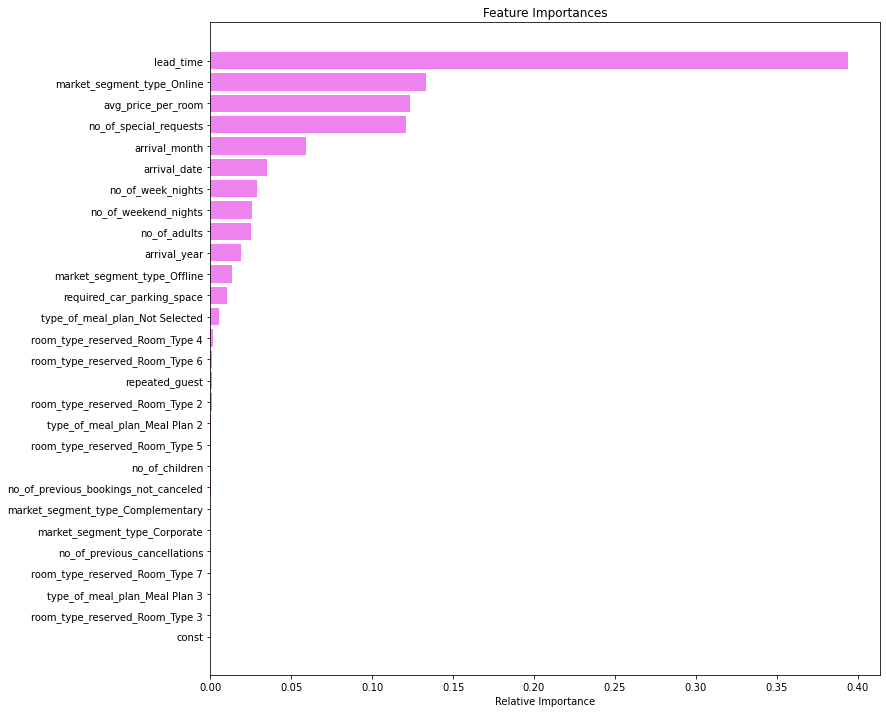

<IPython.core.display.Javascript object>

In [141]:
importances = best_model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

### Observations:
* Lead time is more than average price of the room.
* while online bookings move up by several places.
* arrival price increased one more level
* arrival month increased to higher level.

### Comparing Decision Tree models

In [142]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        decision_tree_perf_train.T,
        decision_tree_tune_perf_train.T,
        decision_tree_post_perf_train.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Decision Tree sklearn",
    "Decision Tree (Pre-Pruning)",
    "Decision Tree (Post-Pruning)",
]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Decision Tree sklearn,Decision Tree (Pre-Pruning),Decision Tree (Post-Pruning)
Accuracy,0.99421,0.87136,0.89989
Recall,0.98661,0.81034,0.90303
Precision,0.99578,0.79587,0.81353
F1,0.99117,0.80304,0.85594


<IPython.core.display.Javascript object>

#### Observation:
* F1 score is very high 99%

In [143]:
# testing performance comparison

models_test_comp_df = pd.concat(
    [decision_tree_post_test.T, decision_tree_perf_test.T], axis=1,
)

print("Test performance comparison:")
models_test_comp_df



Test performance comparison:


,0,0
Accuracy,0.86879,0.87136
Recall,0.85576,0.81034
Precision,0.76614,0.79587
F1,0.80848,0.80304


<IPython.core.display.Javascript object>

### Business Recommendations

#### Observation:

* We analyzed the "INNHotelsGroup"using different techniques and used Decision Tree to build a predictive model for the same.

* Lead time, price & online bookings have influence on cancellations so cancellation policy.

* We visualized different trees and their confusion matrix to get a better understanding of the model.

* Post-pruning model has F1 score high so it is the best model.

* It can be used for future predictions.

#### Recommendations:

* Cancelation has influence of online booking,price and lead_time.

* By providing more offers/benefits to repeated customers more new customers can be attracted.

* Adding more customization can reduce booking cancellations.

* Providing competitive price on rooms helps to increase booking.
